We are dealing with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo)

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
prices = pd.read_csv('prices_ebay_yahoo.csv', index_col=0, parse_dates=True)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1278 entries, 2010-01-04 to 2015-01-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EBAY    1278 non-null   float64
 1   YHOO    1278 non-null   float64
dtypes: float64(2)
memory usage: 30.0 KB


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = (15, 12)

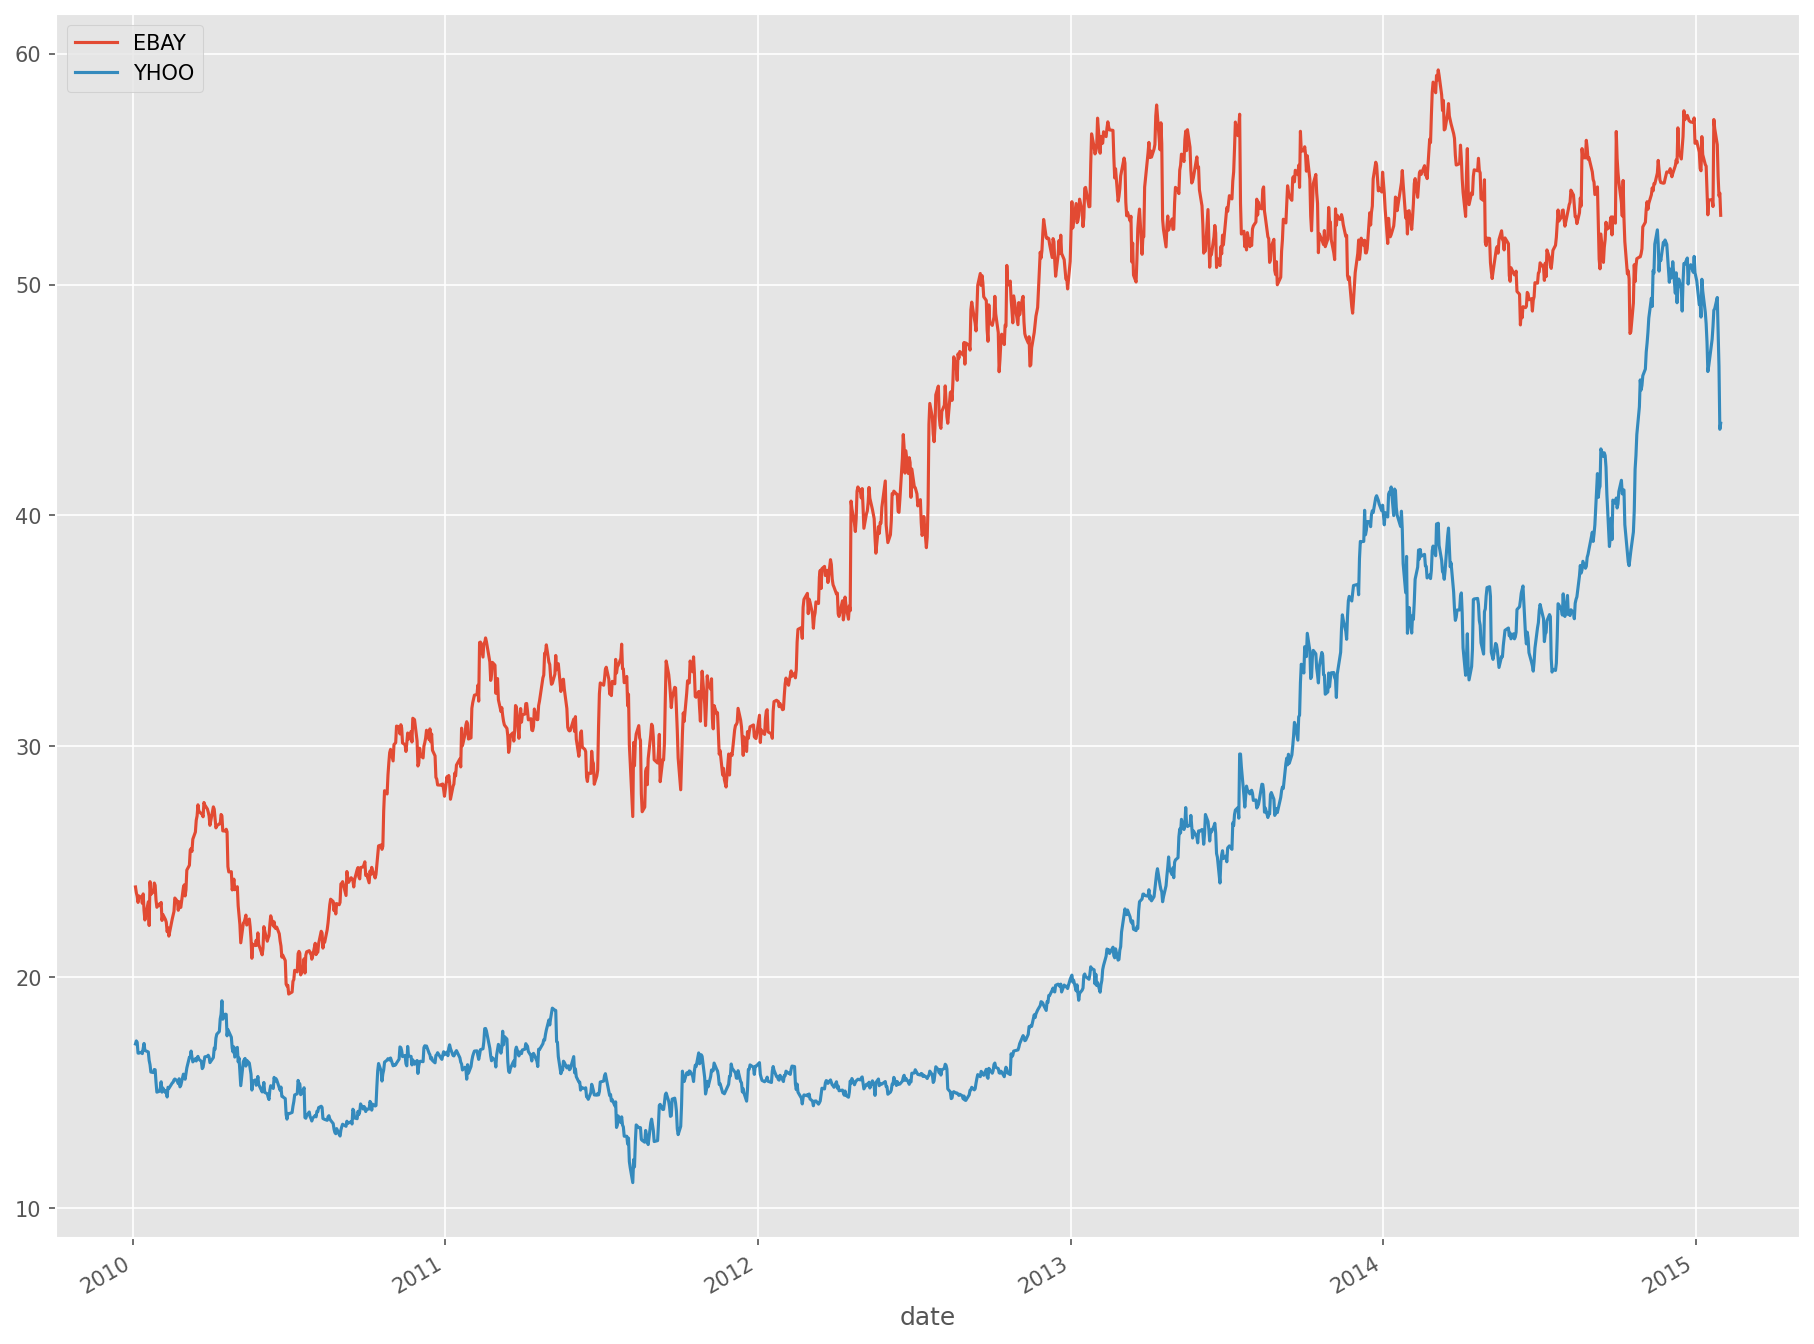

In [6]:
# Plot the raw values over time
prices.plot()
# add legend and set position to upper left
plt.legend( loc='upper left')
plt.show()

/tmp/ipython-input-3741118643.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( loc='upper left')


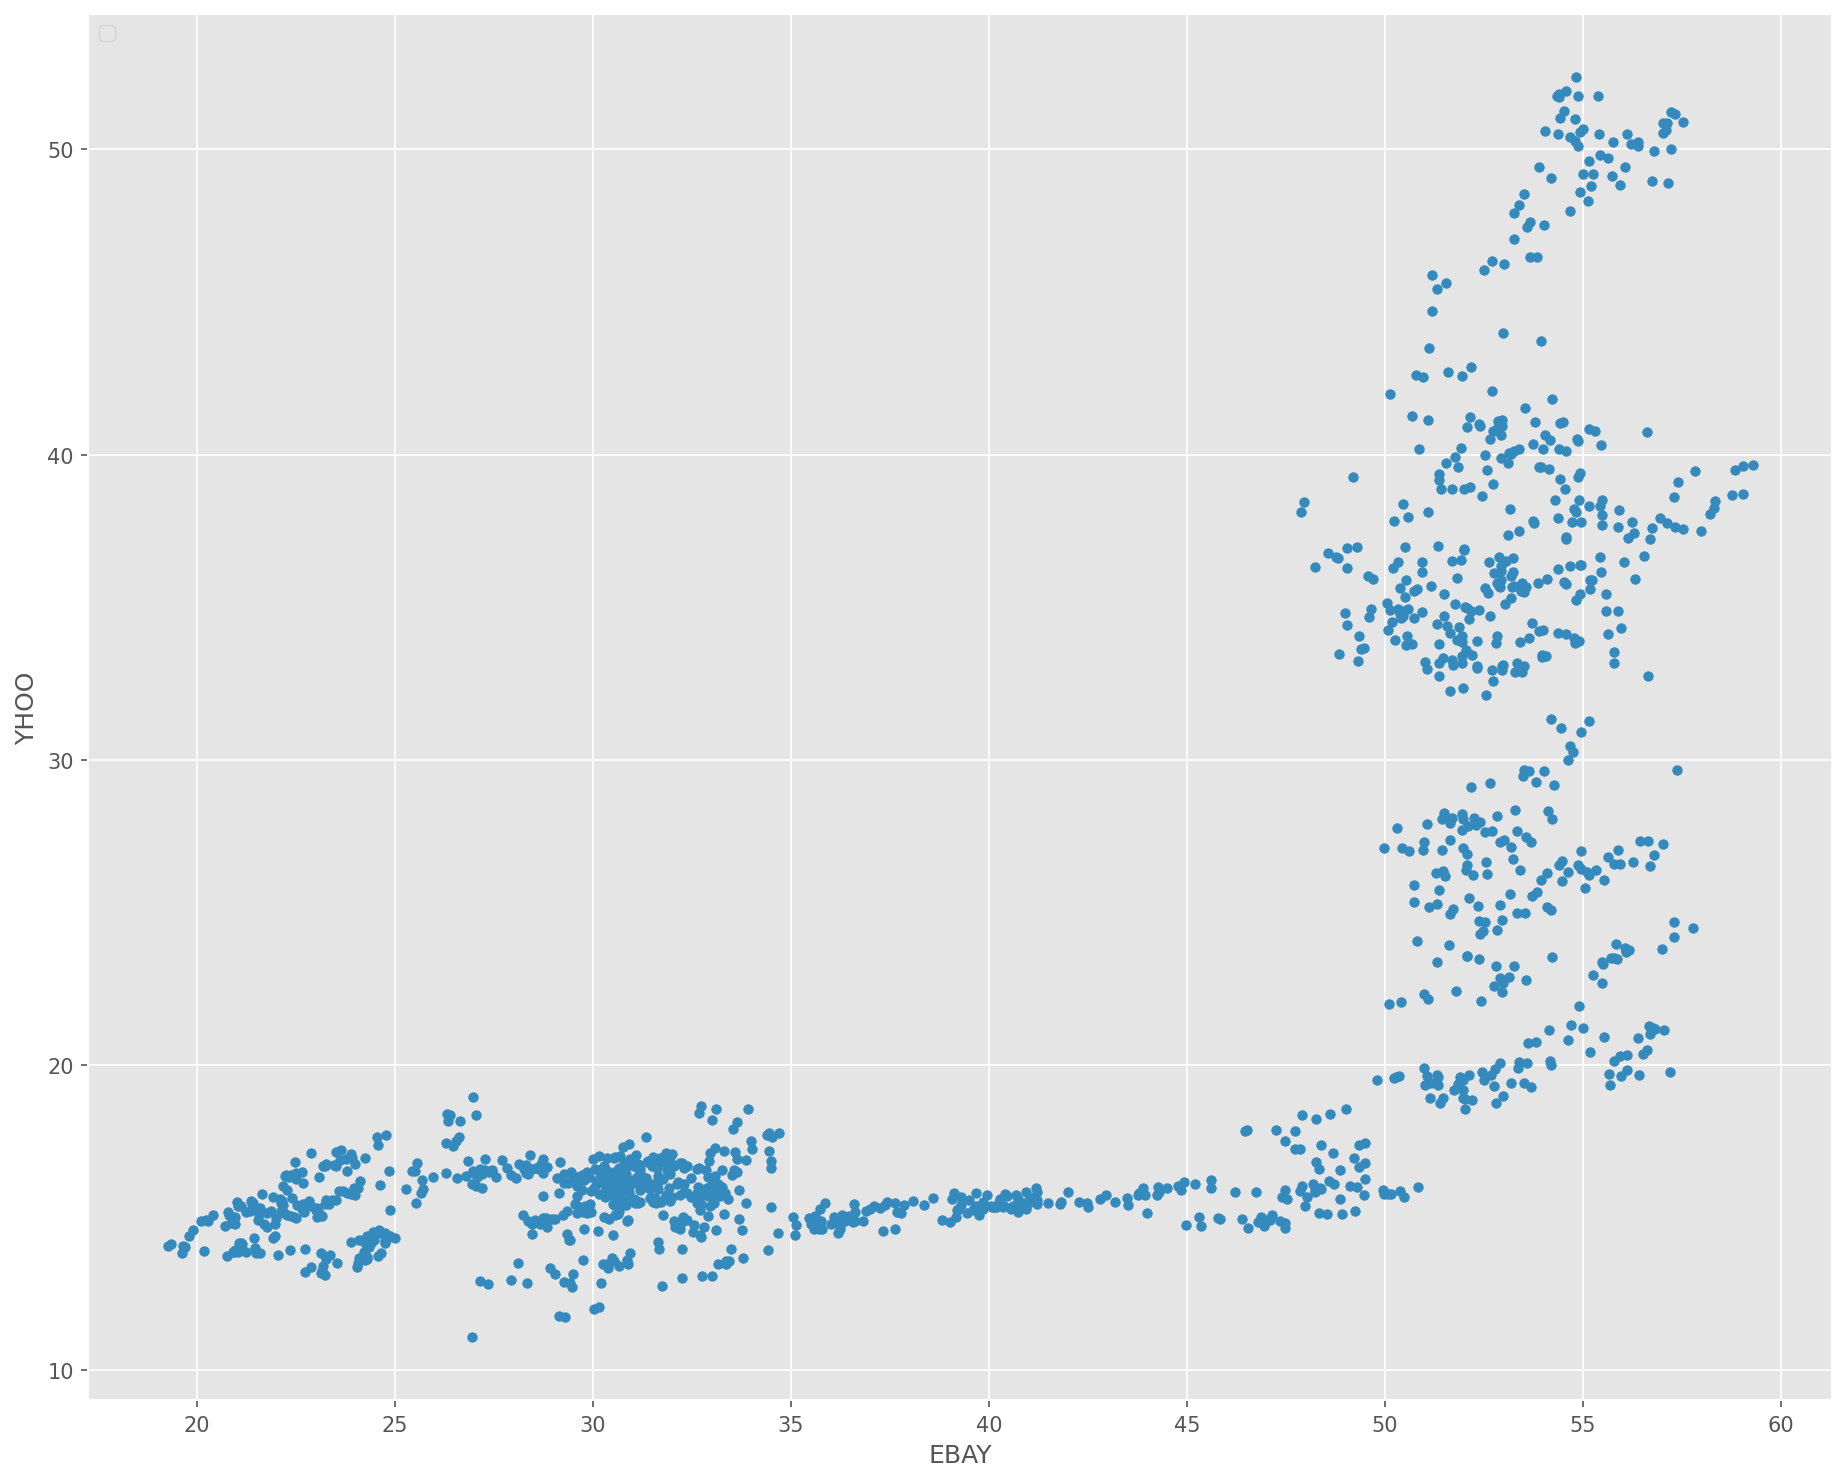

In [7]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.legend( loc='upper left')
plt.show()

[Text(1, 1.26e+18, 'Dec 2009'),
 Text(1, 1.28e+18, 'Jul 2010'),
 Text(1, 1.3e+18, 'Mar 2011'),
 Text(1, 1.32e+18, 'Oct 2011'),
 Text(1, 1.34e+18, 'Jun 2012'),
 Text(1, 1.36e+18, 'Feb 2013'),
 Text(1, 1.38e+18, 'Sep 2013'),
 Text(1, 1.4e+18, 'May 2014'),
 Text(1, 1.42e+18, 'Dec 2014'),
 Text(1, 1.44e+18, 'Aug 2015')]

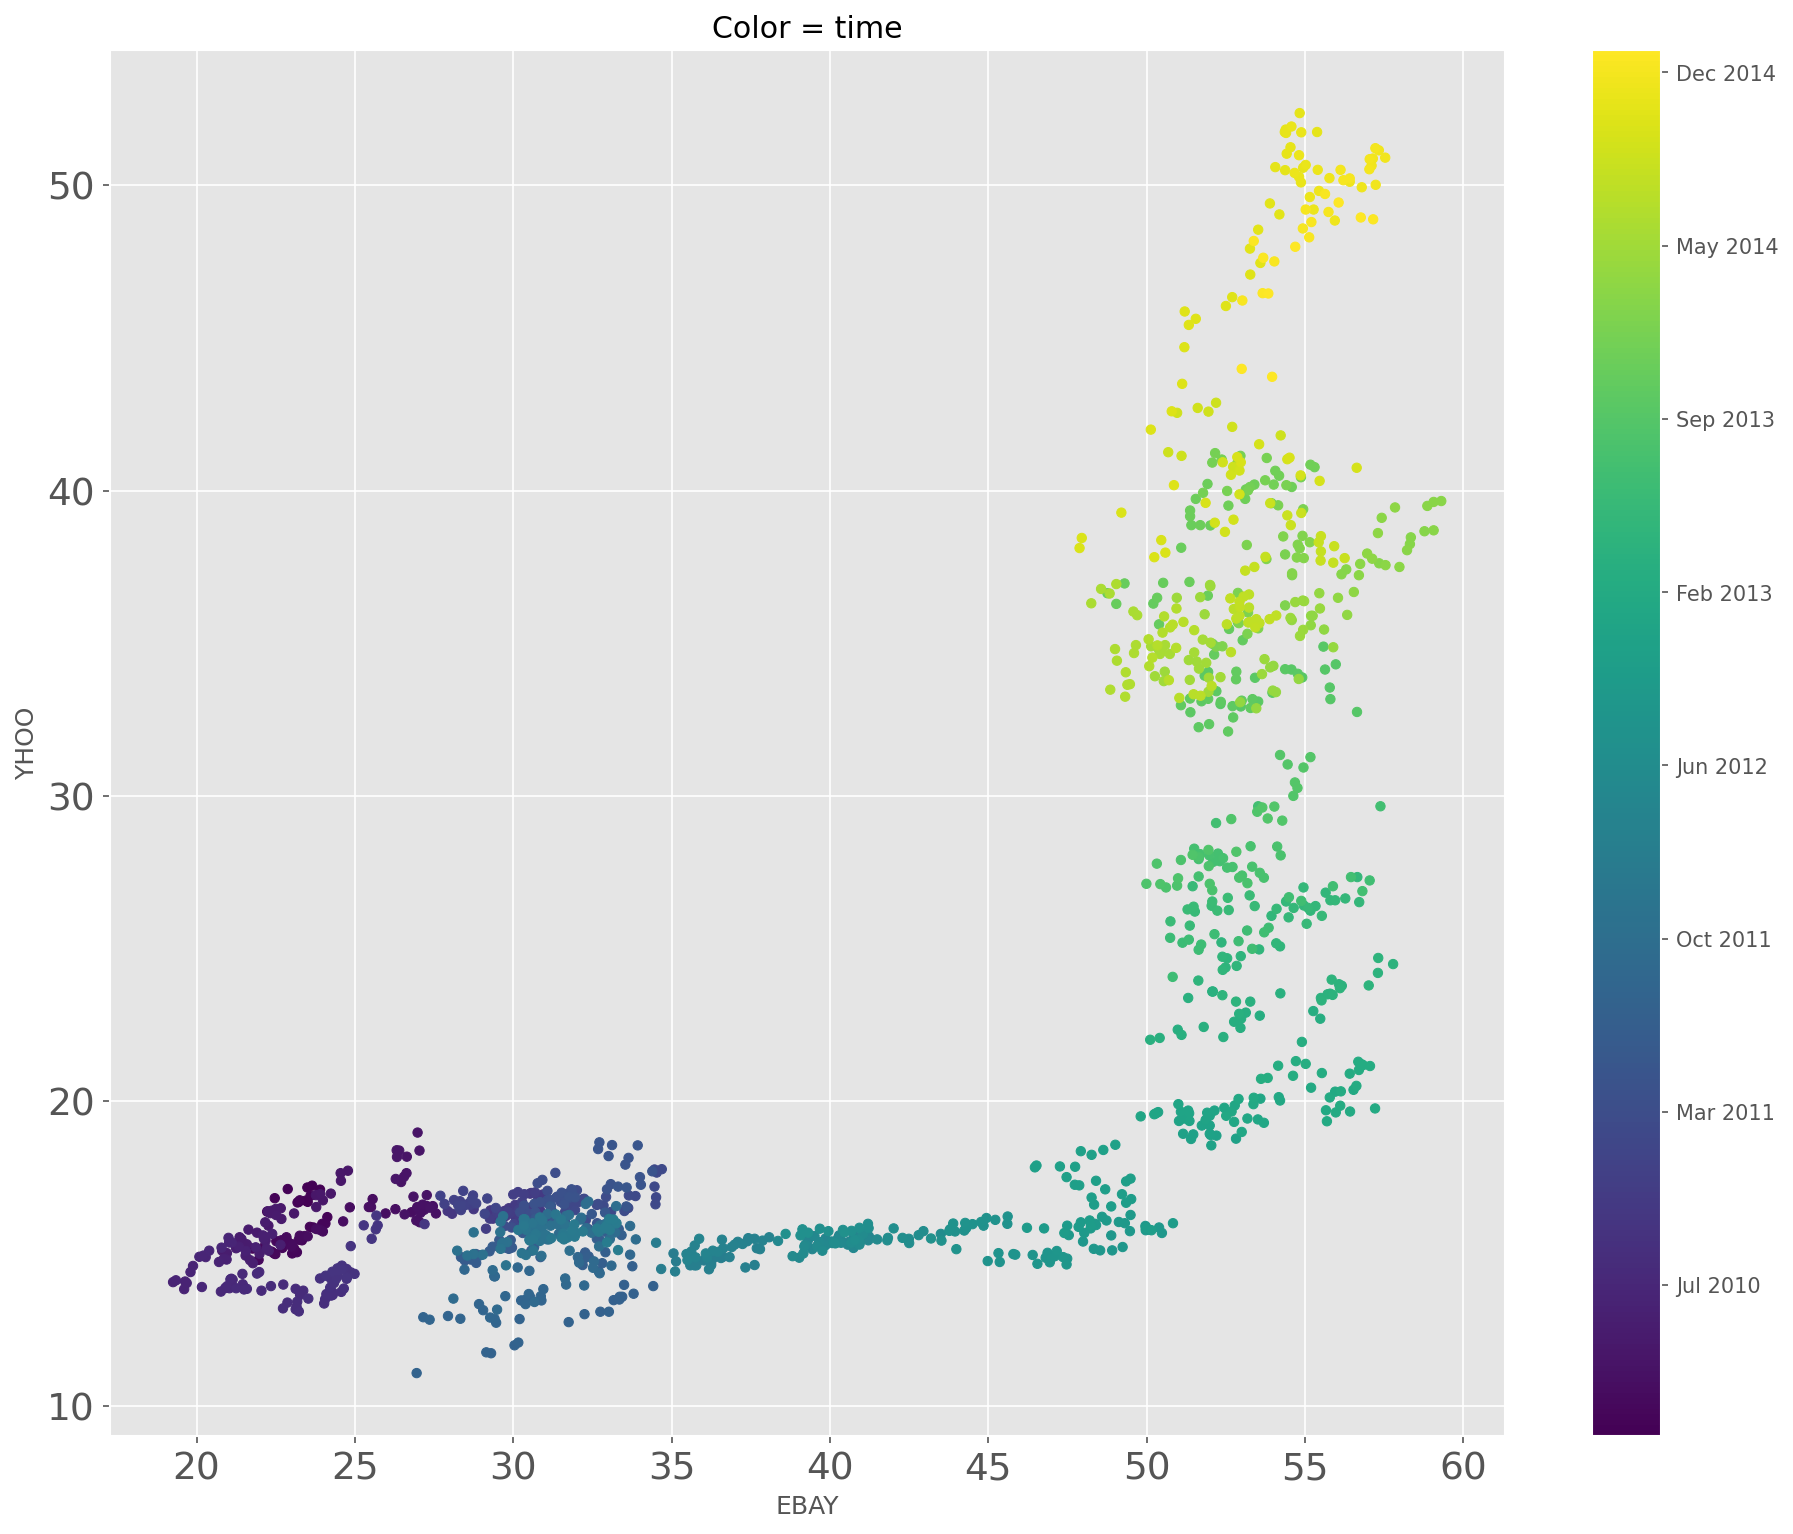

In [10]:
# Scatterplot with color relating to time
ax = prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False, sharex=False, fontsize=18, title='Color = time')

# Define your mappable for colorbar creation
sm = plt.cm.ScalarMappable(cmap='viridis',
                           norm=plt.Normalize(vmin=prices.index.min().value,
                                              vmax=prices.index.max().value))
cbar = plt.colorbar(sm, ax=ax)
# Change the numeric ticks into ones that match the x-axis
from matplotlib.ticker import FixedLocator
cbar.ax.yaxis.set_major_locator(FixedLocator(cbar.get_ticks()))
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))

/tmp/ipython-input-2610953764.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))
/tmp/ipython-input-2610953764.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar2.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))


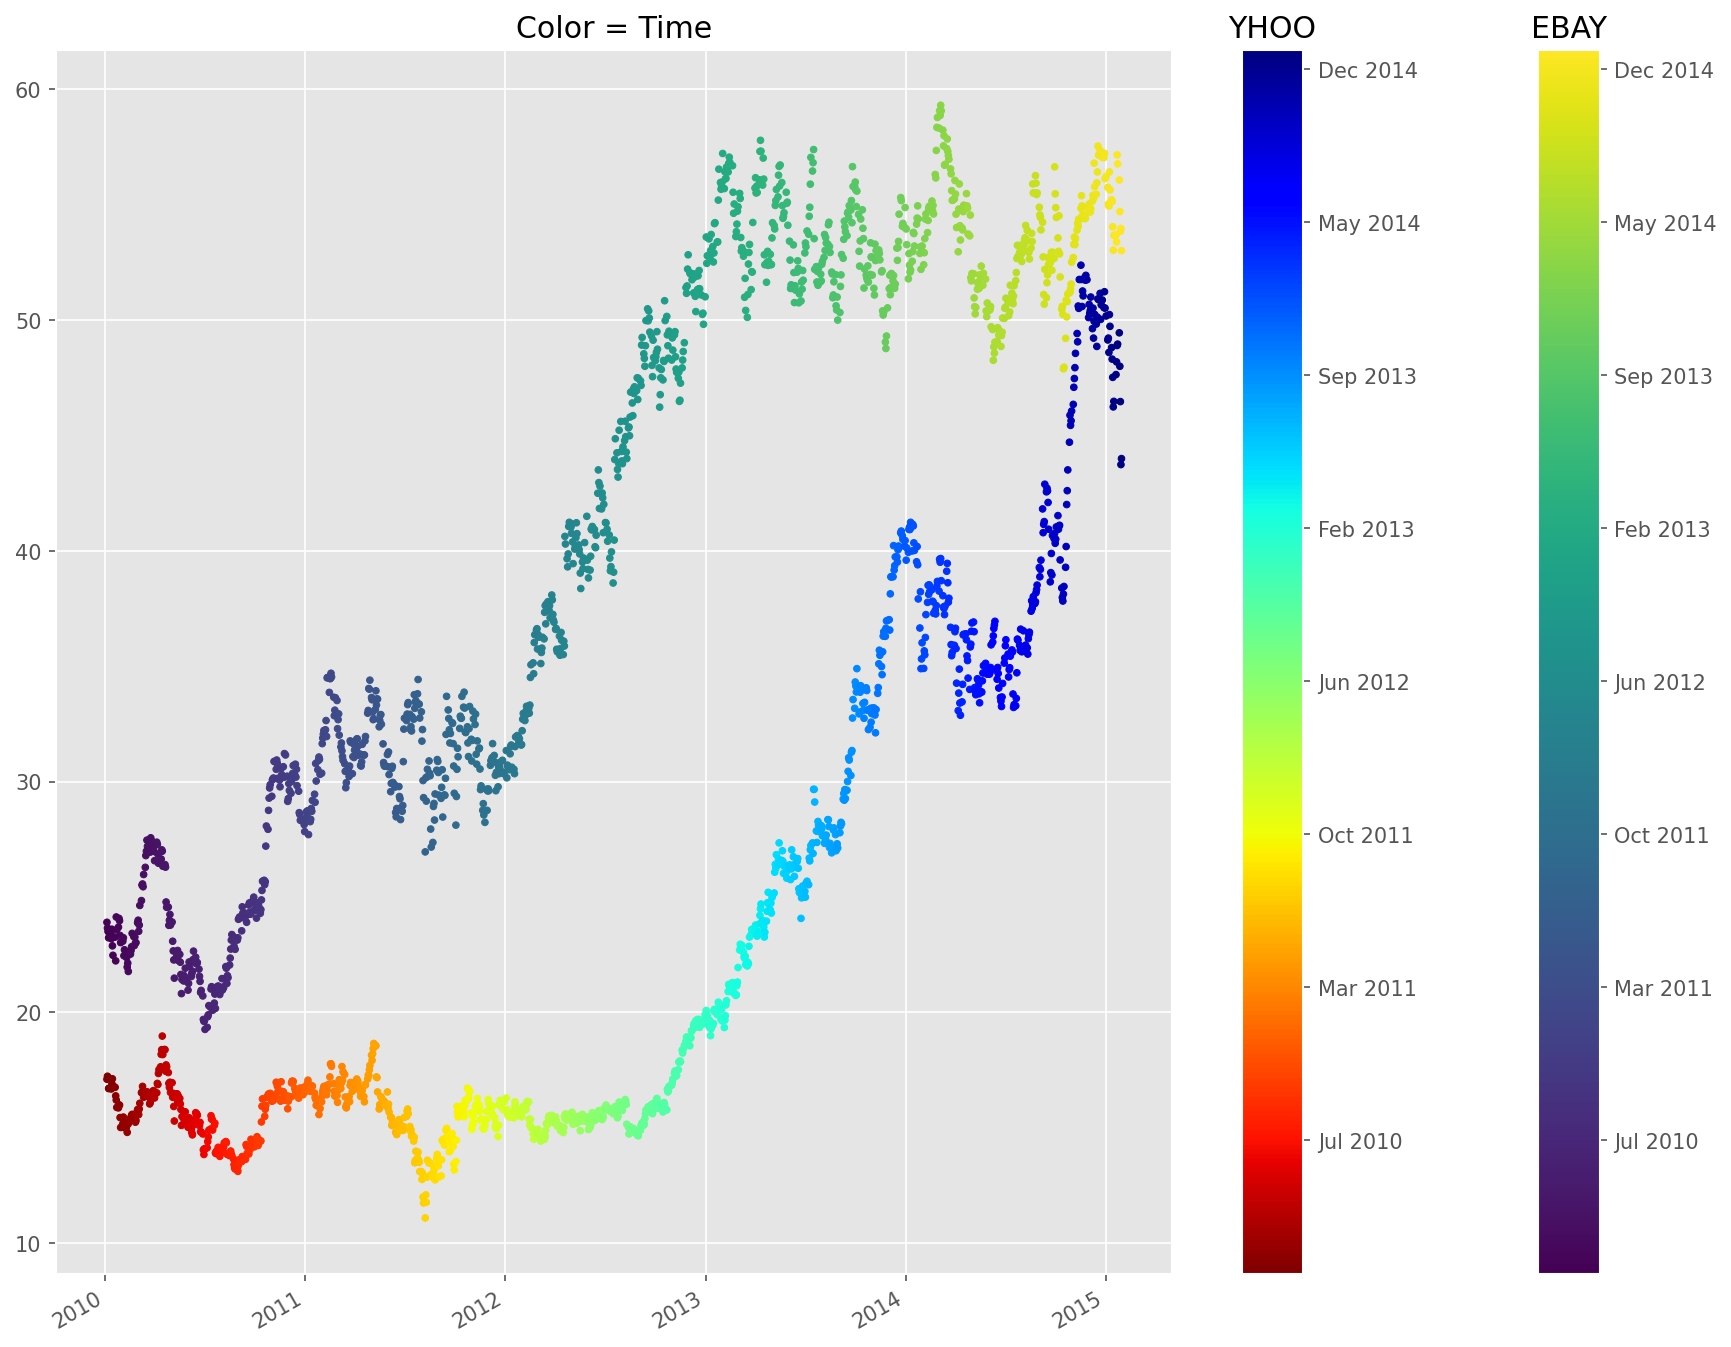

In [11]:
df = prices

fig,ax=plt.subplots()
sca  = ax.scatter(df.index,df['EBAY'],c=df.index,cmap='viridis', s=10)
sca2 = ax.scatter(df.index,df['YHOO'],c=df.index,cmap='jet_r', s=10)


cbar = plt.colorbar(sca)
cbar.ax.set_title("EBAY")
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))

cbar2 = plt.colorbar(sca2)
cbar2.ax.set_title("YHOO")
cbar2.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %Y'))

fig.autofmt_xdate()
ax.set_title("Color = Time")
plt.show()


As you can see, these two time series seem somewhat related to each other, though its a complex relationship that changes over time.

Now we'll look at a larger number of companies.

In [12]:
import re, csv, os

file_path = 'all_prices.txt'

with open(file_path, "r") as f:
    plain_str = f.read()
    print(plain_str[:10], plain_str[-10:])
    csv_data = re.match(r".*?b\'(.*)\'.*?", plain_str).group(1) # remove byte traces
    print("START:\n",csv_data[:250],"\nEND:", csv_data[-250:])

    csv_data = csv_data.replace('\\n', '\n') # remove \\n with actual new line chars
    print("START:\n",csv_data[:250],"\nEND:", csv_data[-250:])

    with open(os.path.splitext(file_path)[0] + '.csv', 'w') as out:
        out.write(csv_data)

b'date,AAP 0002\n' 


START:
 date,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,CSCO,DAL,EBAY,F,FB,FCX,FITB,FOXA,FTR,GE,GILD,GLW,GM,HAL,HBAN,HPE,HPQ,INTC,JPM,KEY,KMI,KO,MRK,MRO,MSFT,MU,NFLX,NVDA,ORCL,PFE,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO\n2010-01-04,214.009998,54.459951,29.88999 
END: ,10.02,,36.129996000000006,33.040001000000004,54.380001,12.99,41.049999,41.169998,60.279999,26.6,40.400002,29.27,441.799992,19.200001,41.889999,31.25,62.459999,8.7,87.529999,32.919998,254.910004,45.709999,51.919998,87.41999799999999,13.17,43.990002\n
START:
 date,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,CSCO,DAL,EBAY,F,FB,FCX,FITB,FOXA,FTR,GE,GILD,GLW,GM,HAL,HBAN,HPE,HPQ,INTC,JPM,KEY,KMI,KO,MRK,MRO,MSFT,MU,NFLX,NVDA,ORCL,PFE,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
2010-01-04,214.009998,54.459951,29.889999 
END: 2,10.02,,36.129996000000006,33.040001000000004,54.380001,12.99,41.049999,41.169998,60.279999,26.6,40.400002,29.27,441.799992,19.200001,41.889999,31.25,62.459999,8.7,87.529999,32.919998,254.910004,4

In [13]:
all_prices = pd.read_csv('all_prices.csv', index_col=0, parse_dates=True)
all_prices.head()

AAPL        ABT        AIG   AMAT       ARNC        BAC  \
date                                                                        
2010-01-04  214.009998  54.459951  29.889999  14.30  16.650013  15.690000   
2010-01-05  214.379993  54.019953  29.330000  14.19  16.130013  16.200001   
2010-01-06  210.969995  54.319953  29.139999  14.16  16.970013  16.389999   
2010-01-07  210.580000  54.769952  28.580000  14.01  16.610014  16.930000   
2010-01-08  211.980005  55.049952  29.340000  14.55  17.020014  16.780001   

             BSX     C        CHK      CMCSA  ...       QCOM    RF       SBUX  \
date                                          ...                               
2010-01-04  9.01  3.40  28.090001  16.969999  ...  46.939999  5.42  23.049999   
2010-01-05  9.04  3.53  28.970002  16.740000  ...  48.070000  5.60  23.590000   
2010-01-06  9.16  3.64  28.650002  16.620001  ...  47.599998  5.67  23.420000   
2010-01-07  9.09  3.65  28.720002  16.969999  ...  48.980000  6.17  23.360001   
2010-01-08  9.00  3.59  28.910002  16.920000  ...  49.470001  6.18  23.280001   

                    T          V         VZ        WFC        XOM   XRX  \
date                                                                      
2010-01-04  28.580000  88.139999  33.279869  27.320000  69.150002  8.63   
2010-01-05  28.440001  87.129997  33.339868  28.070000  69.419998  8.64   
2010-01-06  27.610001  85.959999  31.919873  28.110001  70.019997  8.56   
2010-01-07  27.299999  86.760002  31.729875  29.129999  69.800003  8.60   
2010-01-08  27.100000  87.000000  31.749874  28.860001  69.519997  8.57   

                 YHOO  
date                   
2010-01-04  17.100000  
2010-01-05  17.230000  
2010-01-06  17.170000  
2010-01-07  16.700001  
2010-01-08  16.700001  

[5 rows x 50 columns]

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


Fitting a model with raw data doesn't give great results.

When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In [16]:
X = pd.read_csv('X.csv', index_col=[0]).to_numpy()
y = pd.read_csv('y.csv', index_col=[0]).to_numpy()
display(X.shape)
display(y.shape)

(775, 3)

(775, 1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-5.709399019485156


In [18]:
mpl.rcParams['figure.figsize'] = (30, 20)
mpl.rcParams["xtick.labelsize"], mpl.rcParams["ytick.labelsize"] = 25,25

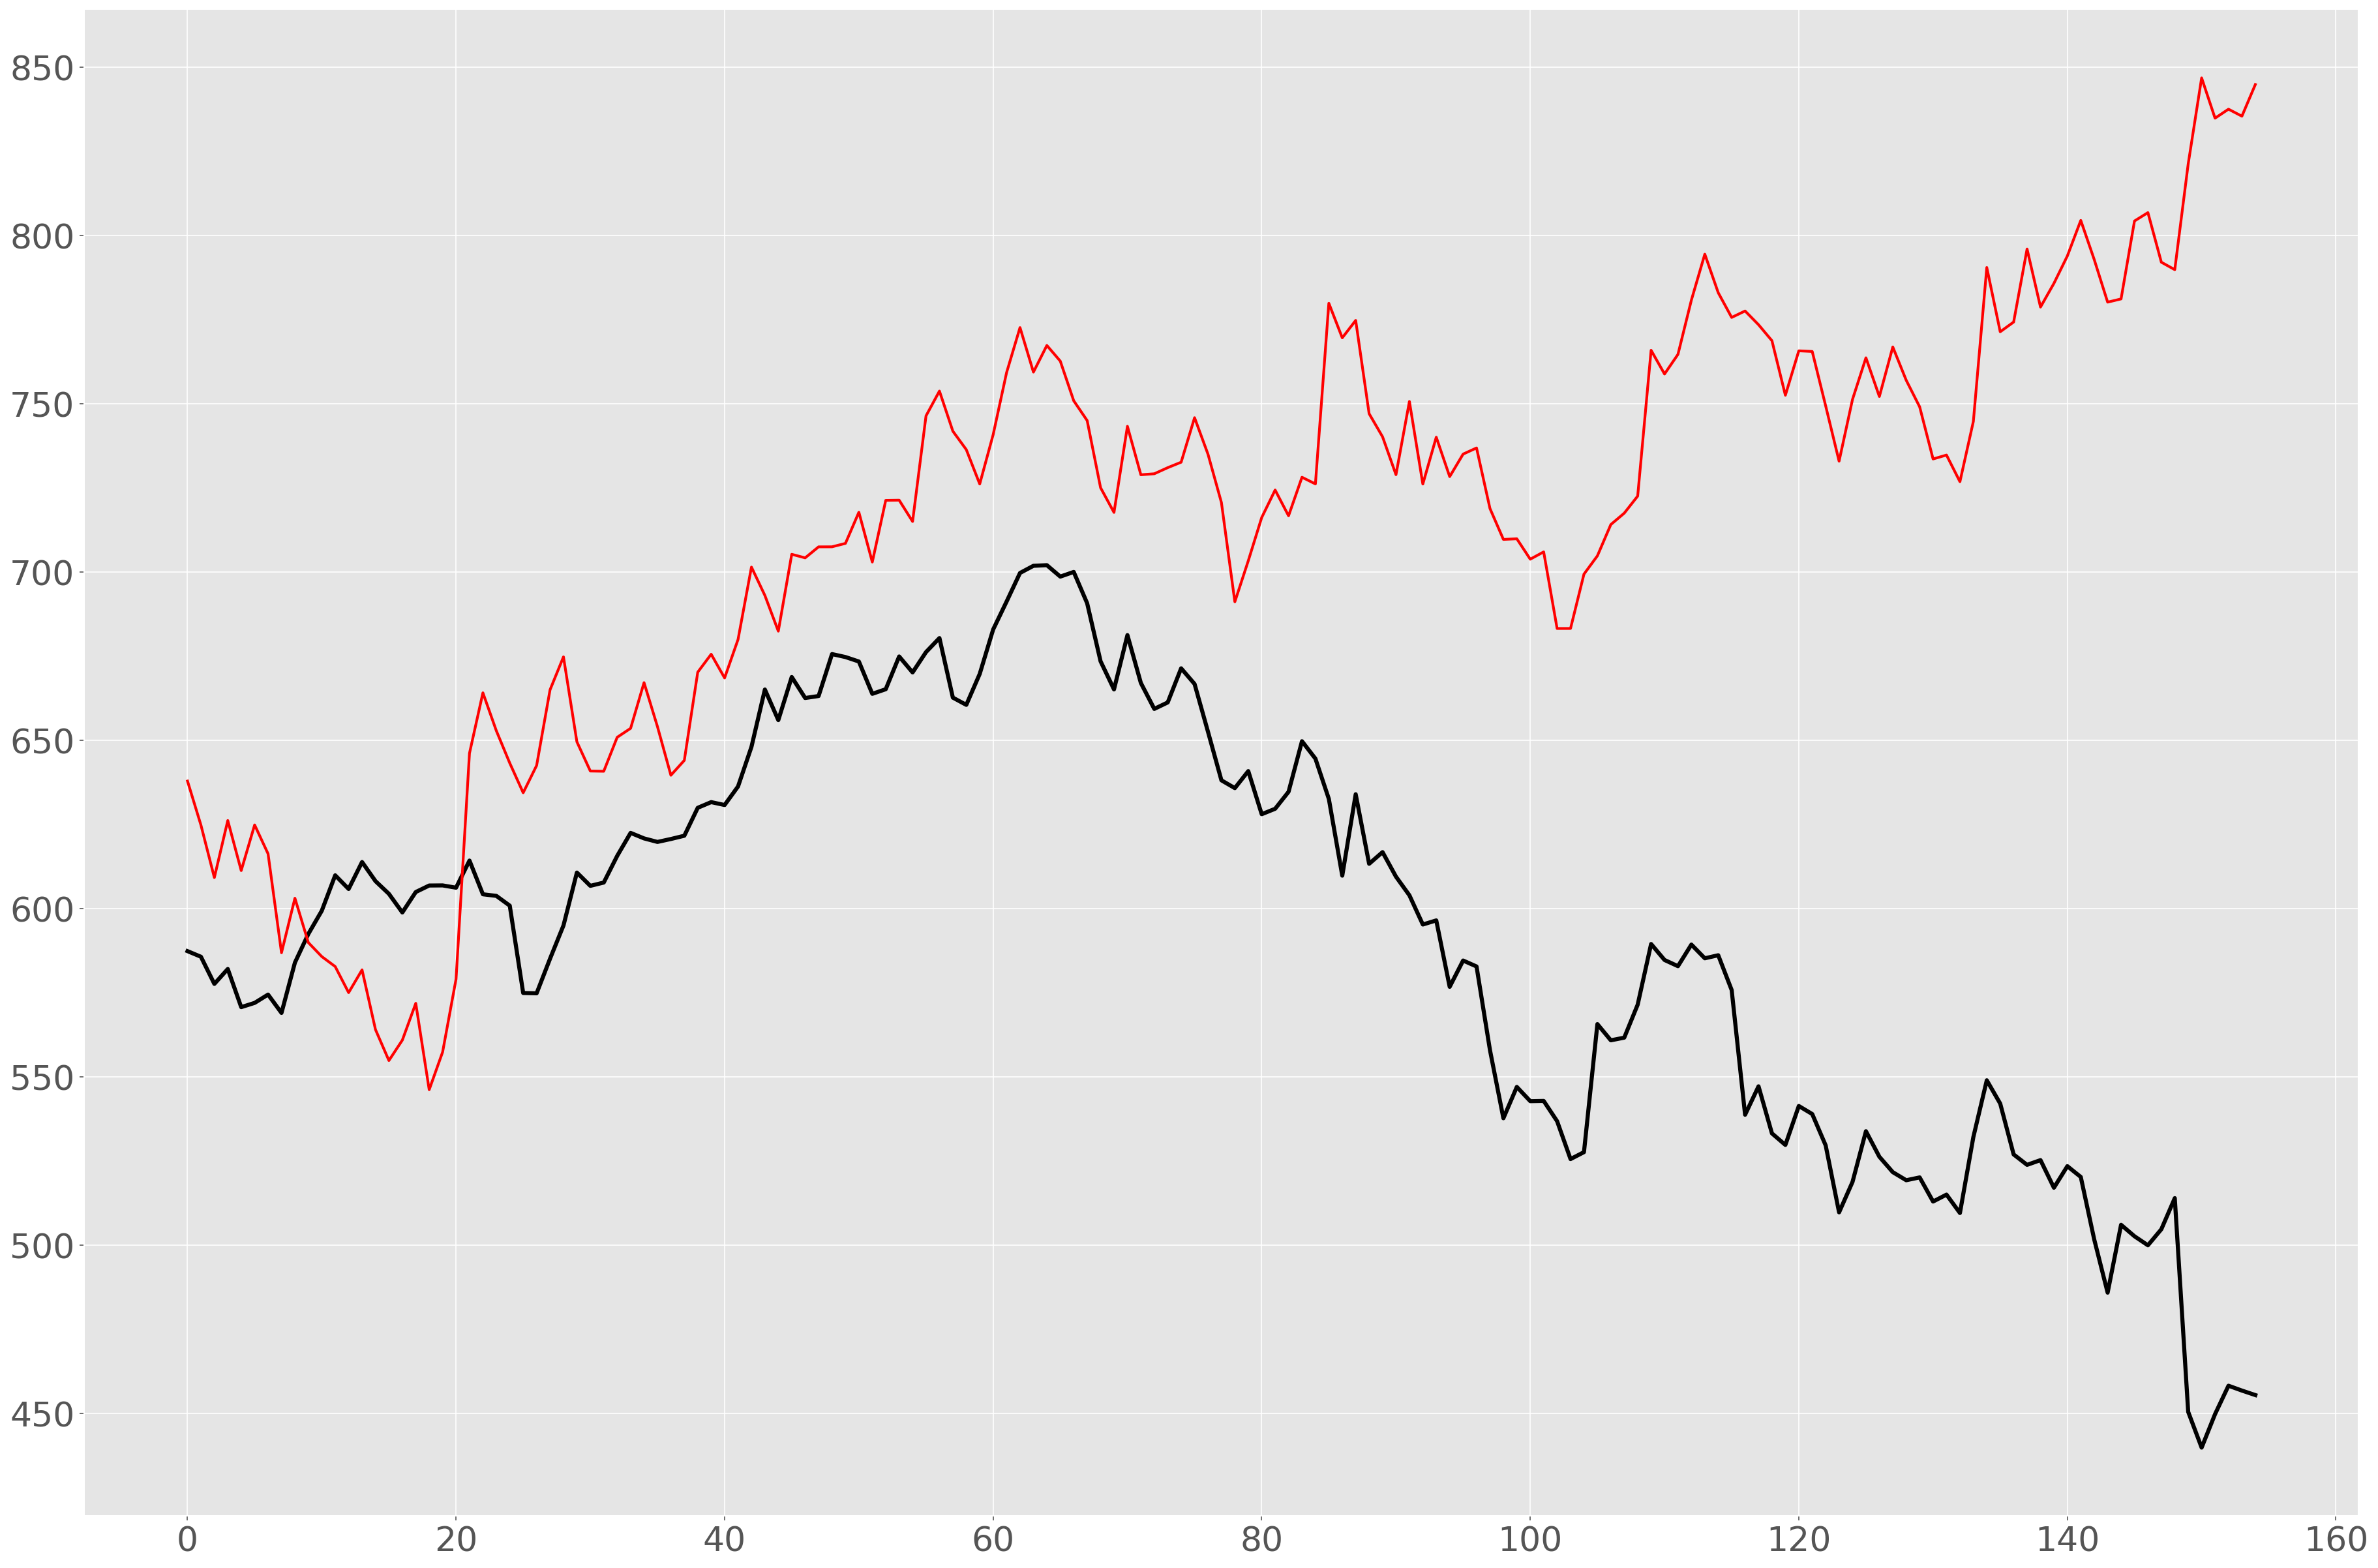

In [20]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots()
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

Now you have an explanation for your poor score. The predictions clearly deviate from the true time series values.

Let's take a look at a new dataset

In [21]:
prices = pd.read_csv('prices_ebay_yahoo_nvidia.csv', parse_dates=True, index_col=0)
prices

EBAY        NVDA       YHOO
date                                        
2010-01-04  23.900000   18.490000  17.100000
2010-01-05  23.650000   18.760000  17.230000
2010-01-06  23.500000   18.879999  17.170000
2010-01-07  23.229998   18.510000  16.700001
2010-01-08  23.509999   18.549999  16.700001
...               ...         ...        ...
2016-12-23  29.790001  109.779999  38.660000
2016-12-27  30.240000  117.320000  38.919998
2016-12-28  30.010000  109.250000  38.730000
2016-12-29  29.980000  111.430000  38.639999
2016-12-30  29.690001  106.739998  38.669998

[1762 rows x 3 columns]

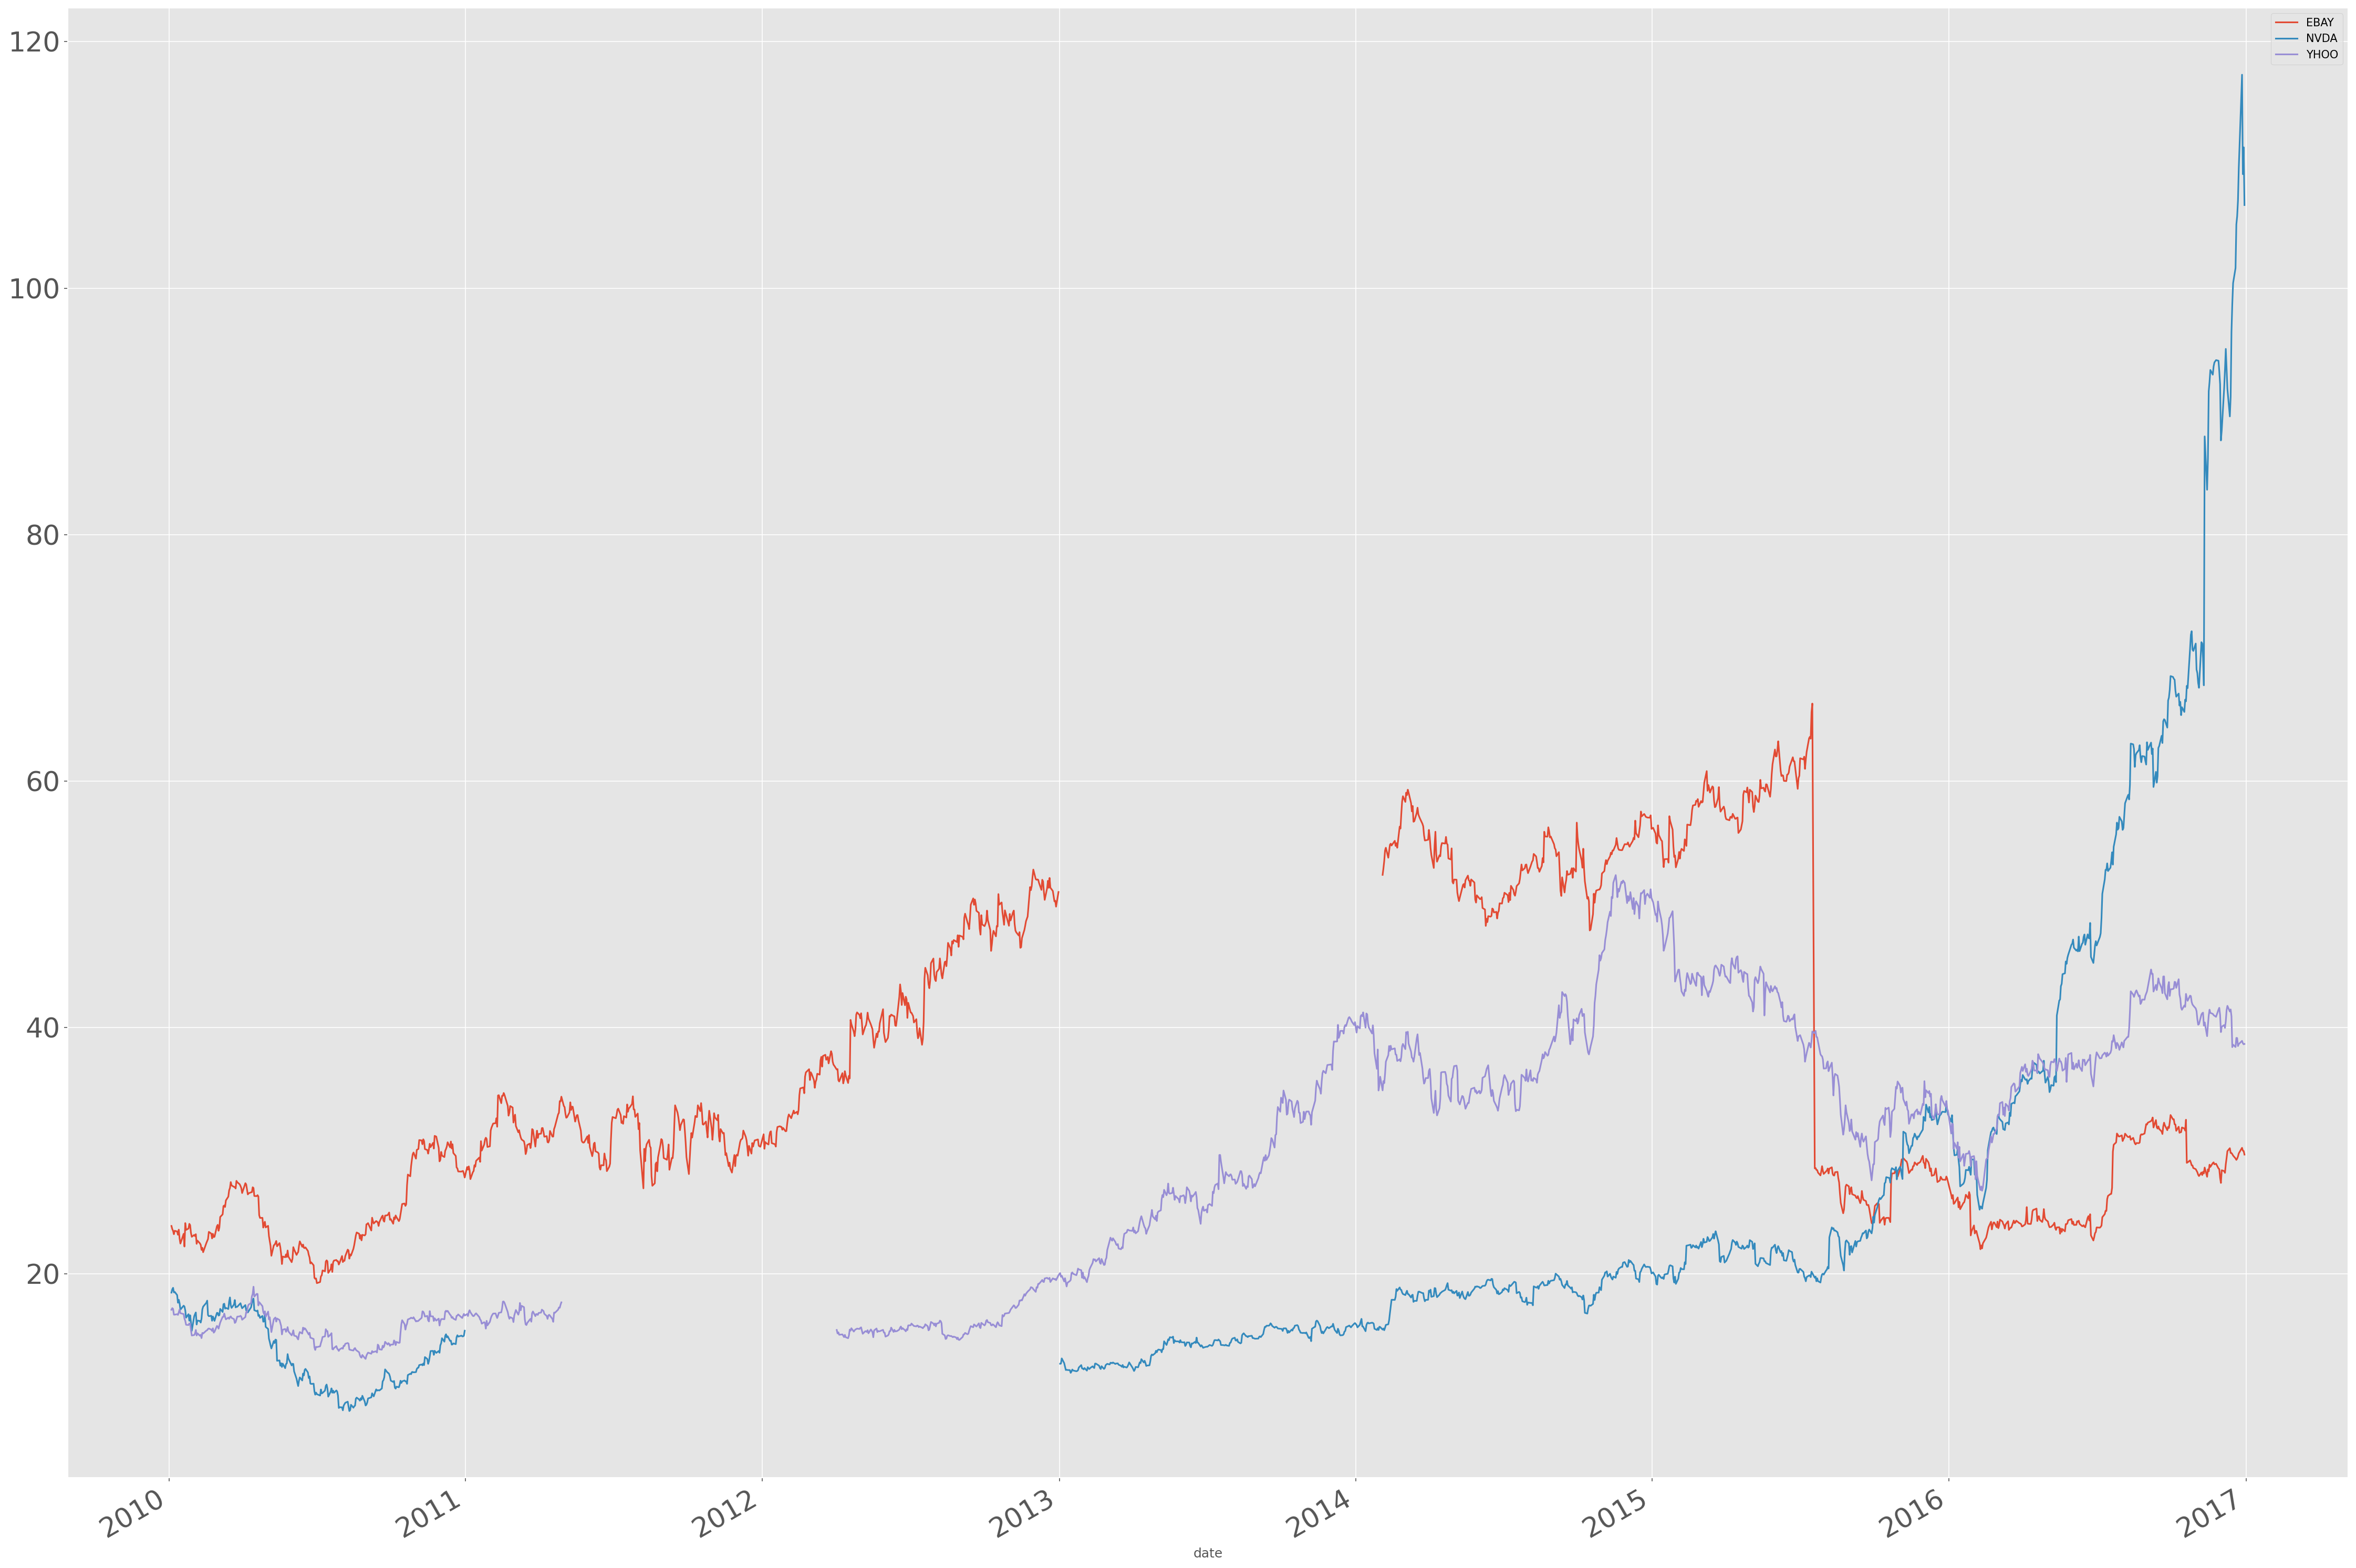

EBAY    273
NVDA    502
YHOO    232
dtype: int64


In [22]:
# Visualize the dataset
prices.plot(legend=True)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

In the plot, you can see there are clearly missing chunks of time in your data. There also seem to be a few 'jumps' in the data.

Using different interpolation methods to fill in some missing values, visualizing the result each time

In [23]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)

    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

In [28]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (30, 20)
mpl.rcParams["xtick.labelsize"], mpl.rcParams["ytick.labelsize"] = 12,12

In [29]:
prices = prices.head(1278)
prices

EBAY       NVDA       YHOO
date                                       
2010-01-04  23.900000  18.490000  17.100000
2010-01-05  23.650000  18.760000  17.230000
2010-01-06  23.500000  18.879999  17.170000
2010-01-07  23.229998  18.510000  16.700001
2010-01-08  23.509999  18.549999  16.700001
...               ...        ...        ...
2015-01-26  56.059999  20.620001  49.439999
2015-01-27  54.690000  19.629999  47.990002
2015-01-28  53.839999  19.309999  46.459999
2015-01-29  53.959999  19.780001  43.730000
2015-01-30  52.999996  19.200001  43.990002

[1278 rows x 3 columns]

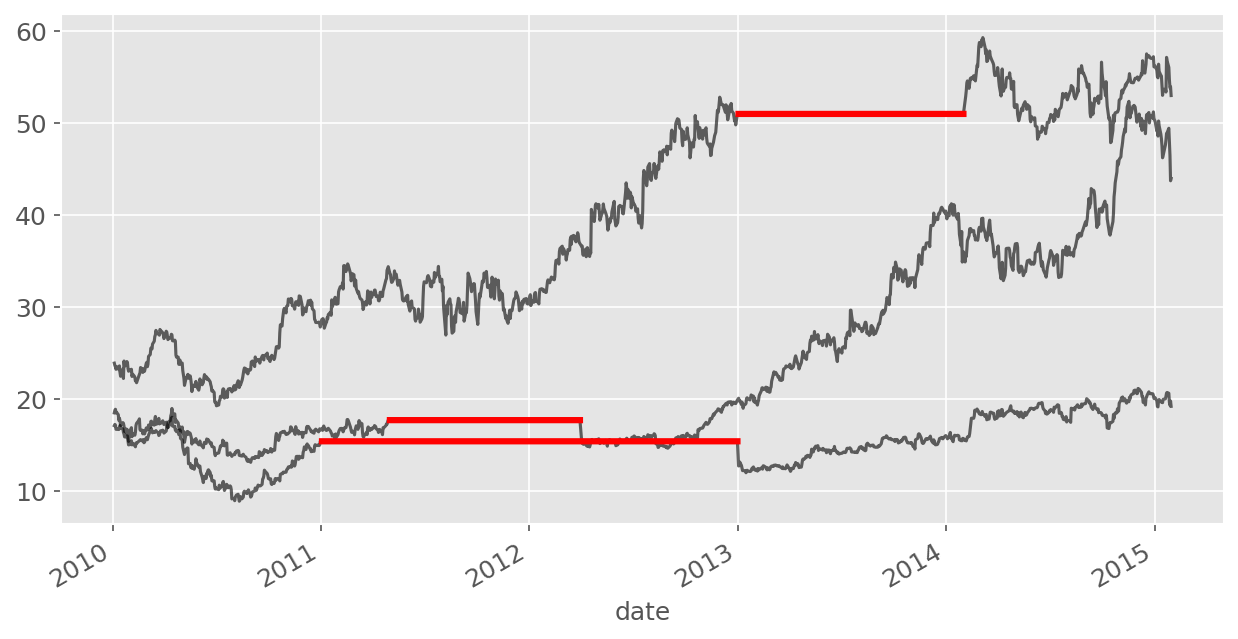

In [30]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

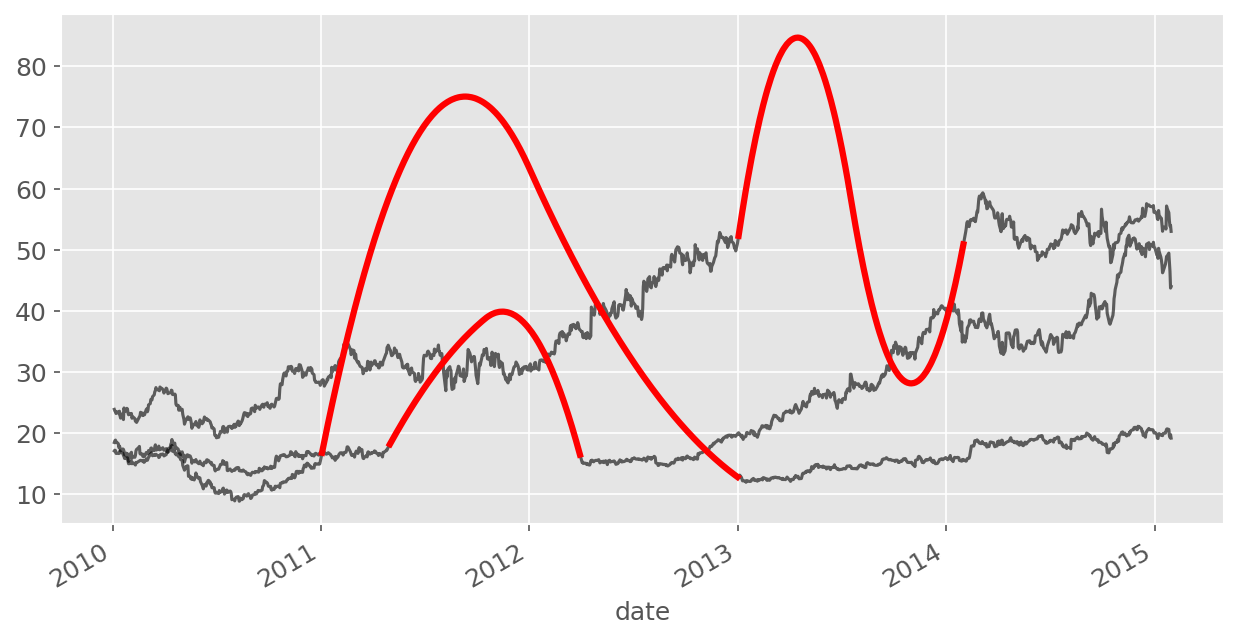

In [31]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

 When you interpolate, the pre-existing data is used to infer the values of missing data. As you can see, the method you use for this has a big effect on the outcome.

Defining a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

In [32]:
prices = all_prices[["EBAY"  , "NVDA"  , "YHOO" ,   "AAPL"]]
prices

EBAY       NVDA       YHOO        AAPL
date                                                   
2010-01-04  23.900000  18.490000  17.100000  214.009998
2010-01-05  23.650000  18.760000  17.230000  214.379993
2010-01-06  23.500000  18.879999  17.170000  210.969995
2010-01-07  23.229998  18.510000  16.700001  210.580000
2010-01-08  23.509999  18.549999  16.700001  211.980005
...               ...        ...        ...         ...
2015-01-26  56.059999  20.620001  49.439999  113.099998
2015-01-27  54.690000  19.629999  47.990002  109.139999
2015-01-28  53.839999  19.309999  46.459999  115.309998
2015-01-29  53.959999  19.780001  43.730000  118.900002
2015-01-30  52.999996  19.200001  43.990002  117.160004

[1278 rows x 4 columns]

In [33]:
mpl.rcParams['figure.figsize'] = (30, 30)
mpl.rcParams["xtick.labelsize"], mpl.rcParams["ytick.labelsize"] = 25,25

In [34]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
   previous_values = series[:-1]
   last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
   percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
   return percent_change

/tmp/ipython-input-1335160052.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = series[-1]


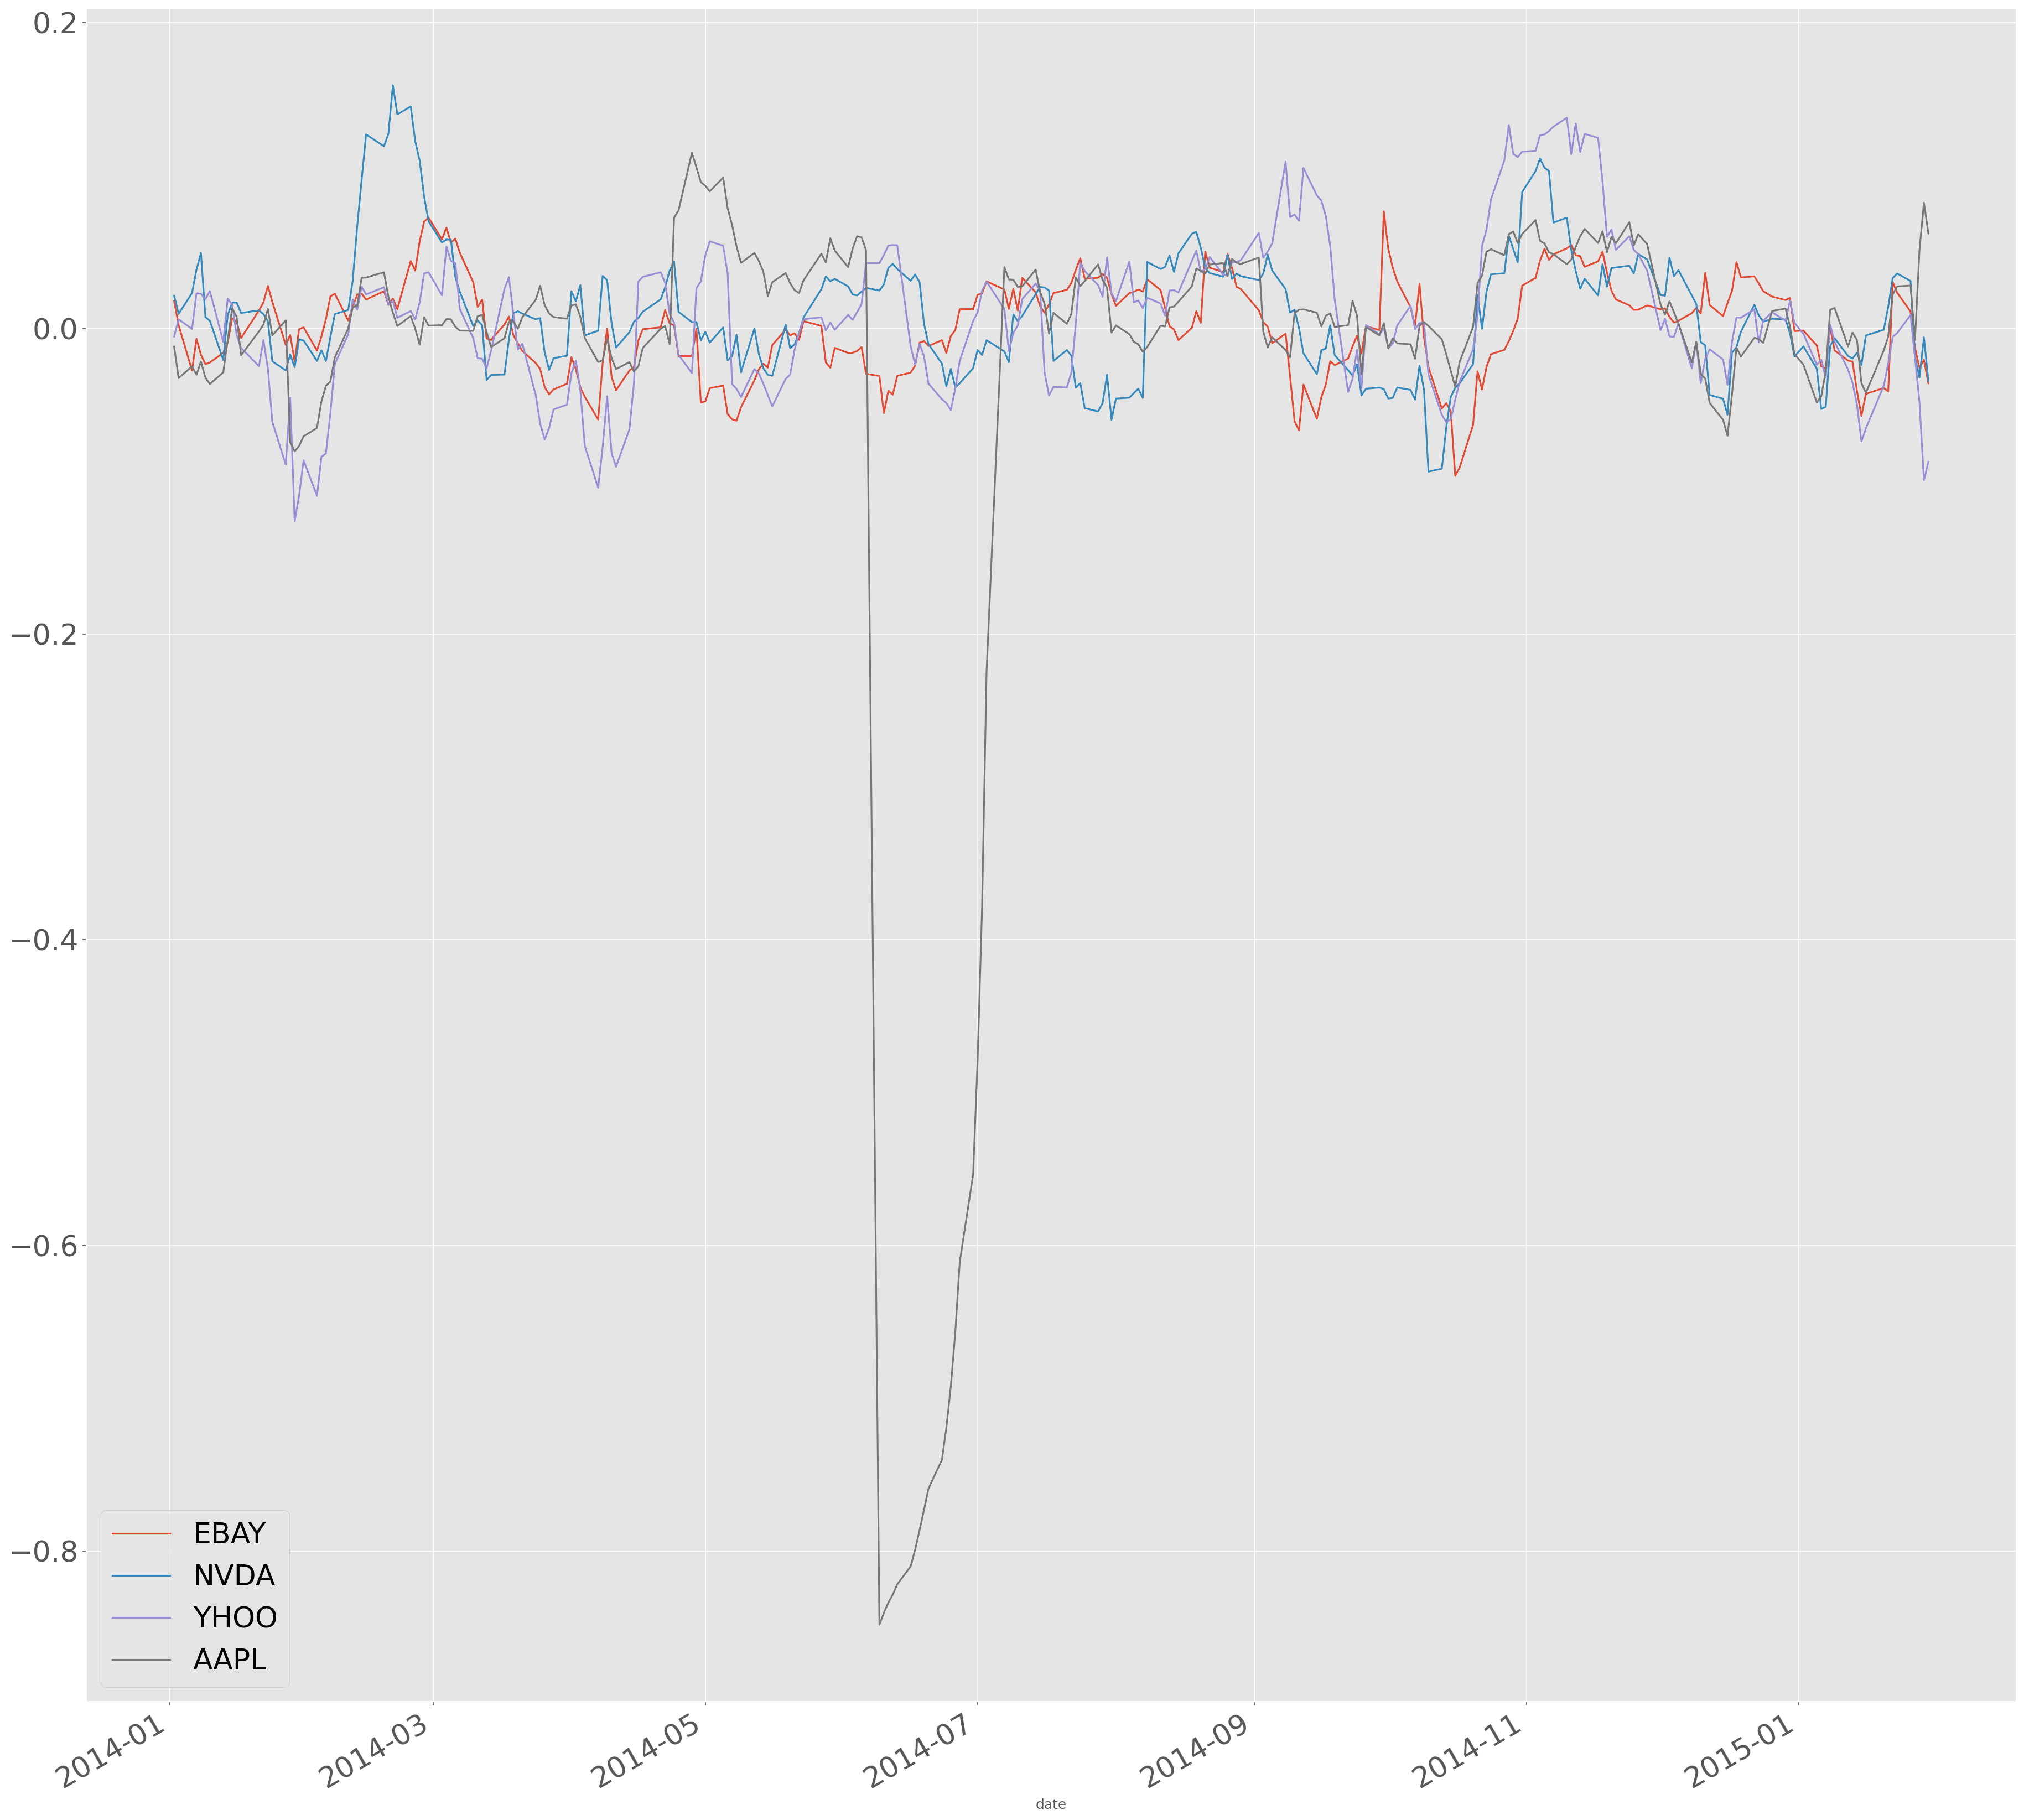

In [37]:
# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.legend(loc="lower left", prop={'size': 25})
plt.show()

You've converted the data so it's easier to compare one time point to another. This is a cleaner representation of the data.

Handling outliers

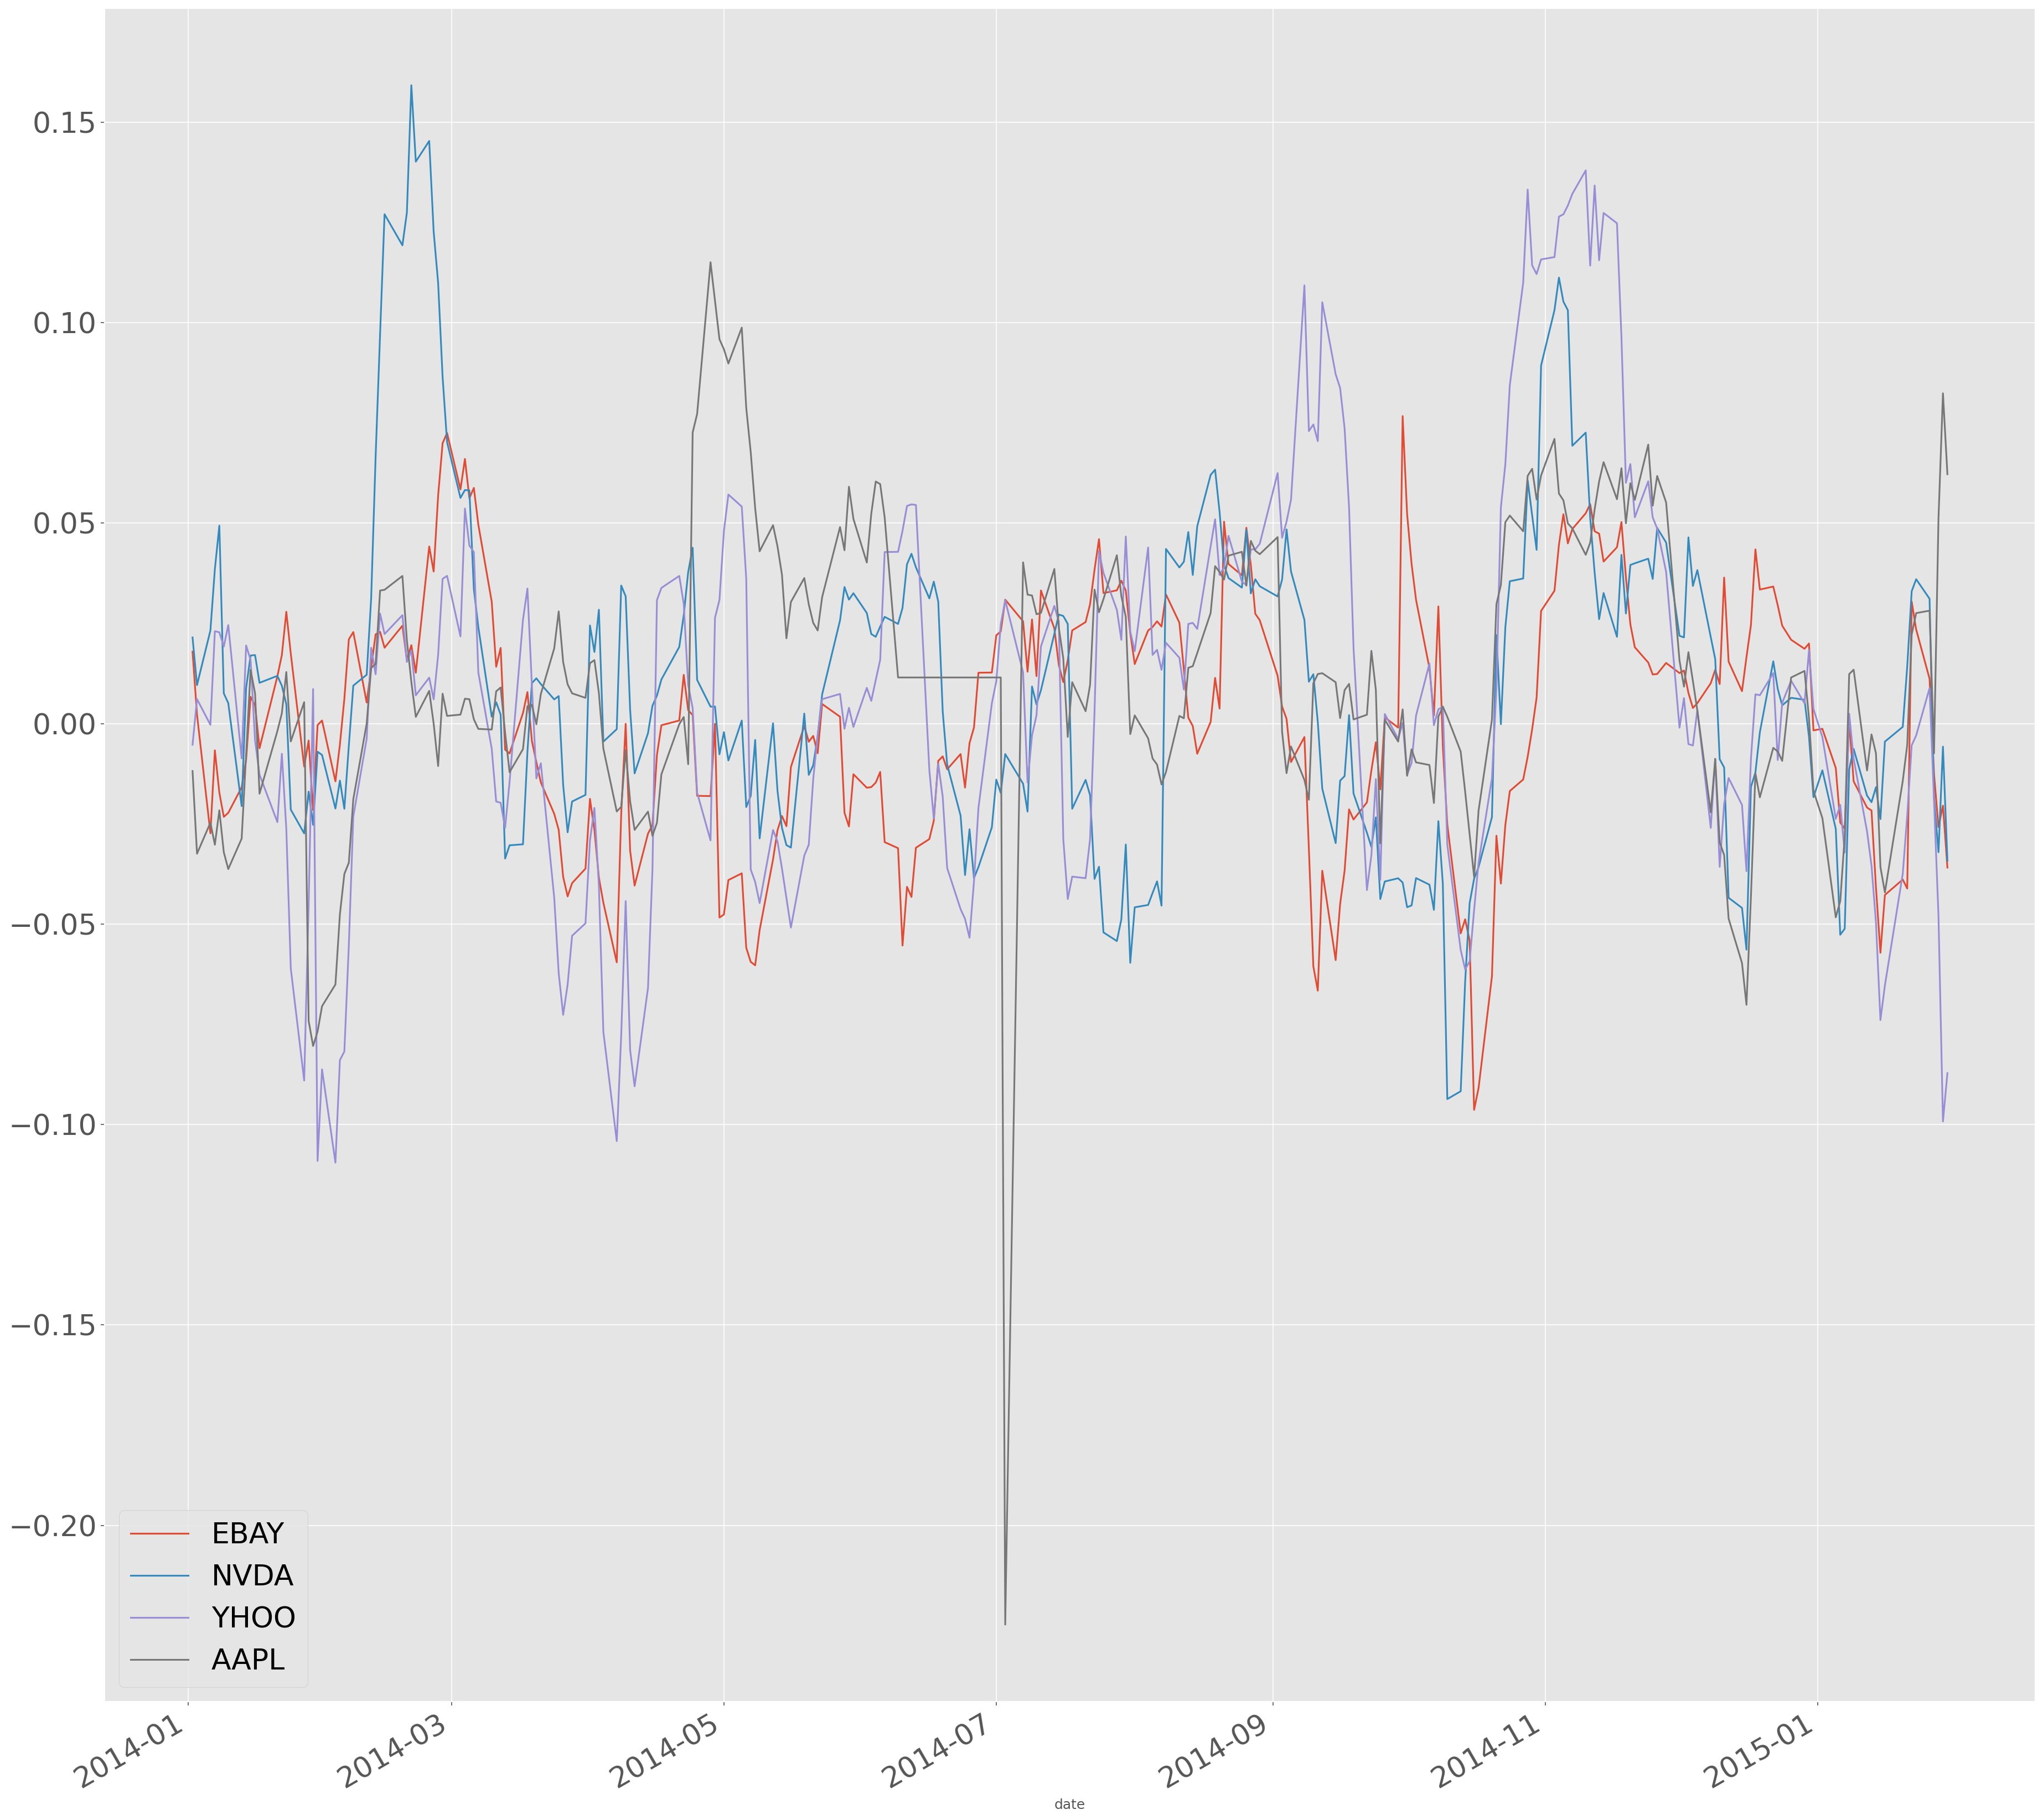

In [38]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)

    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.legend(loc="lower left", prop={'size': 25})
plt.show()


Since you've converted the data to % change over time, it was easier to spot and correct the outliers.

Calculate a collection of features for your time series data and visualize what they look like over time.

In [39]:
prices = pd.read_csv('prices_ebay_yahoo_nvidia.csv', index_col=0, parse_dates=True)
ebay_prices = prices[["EBAY" ]]
prices_perc = ebay_prices.rolling(20).apply(percent_change)
prices_perc

/tmp/ipython-input-1335160052.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = series[-1]


EBAY
date                
2010-01-04       NaN
2010-01-05       NaN
2010-01-06       NaN
2010-01-07       NaN
2010-01-08       NaN
...              ...
2016-12-23  0.024842
2016-12-27  0.038030
2016-12-28  0.026925
2016-12-29  0.021850
2016-12-30  0.007285

[1762 rows x 1 columns]

/tmp/ipython-input-2972407416.py:7: FutureWarning: The provided callable <function min at 0x7c11701ff920> is currently using Rolling.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
/tmp/ipython-input-2972407416.py:7: FutureWarning: The provided callable <function max at 0x7c11701ff7e0> is currently using Rolling.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  features = prices_perc_rolling.aggregate(features_to_calculate)
/tmp/ipython-input-2972407416.py:7: FutureWarning: The provided callable <function mean at 0x7c1170204220> is currently using Rolling.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = prices_perc_rolling.aggregate(features_to_

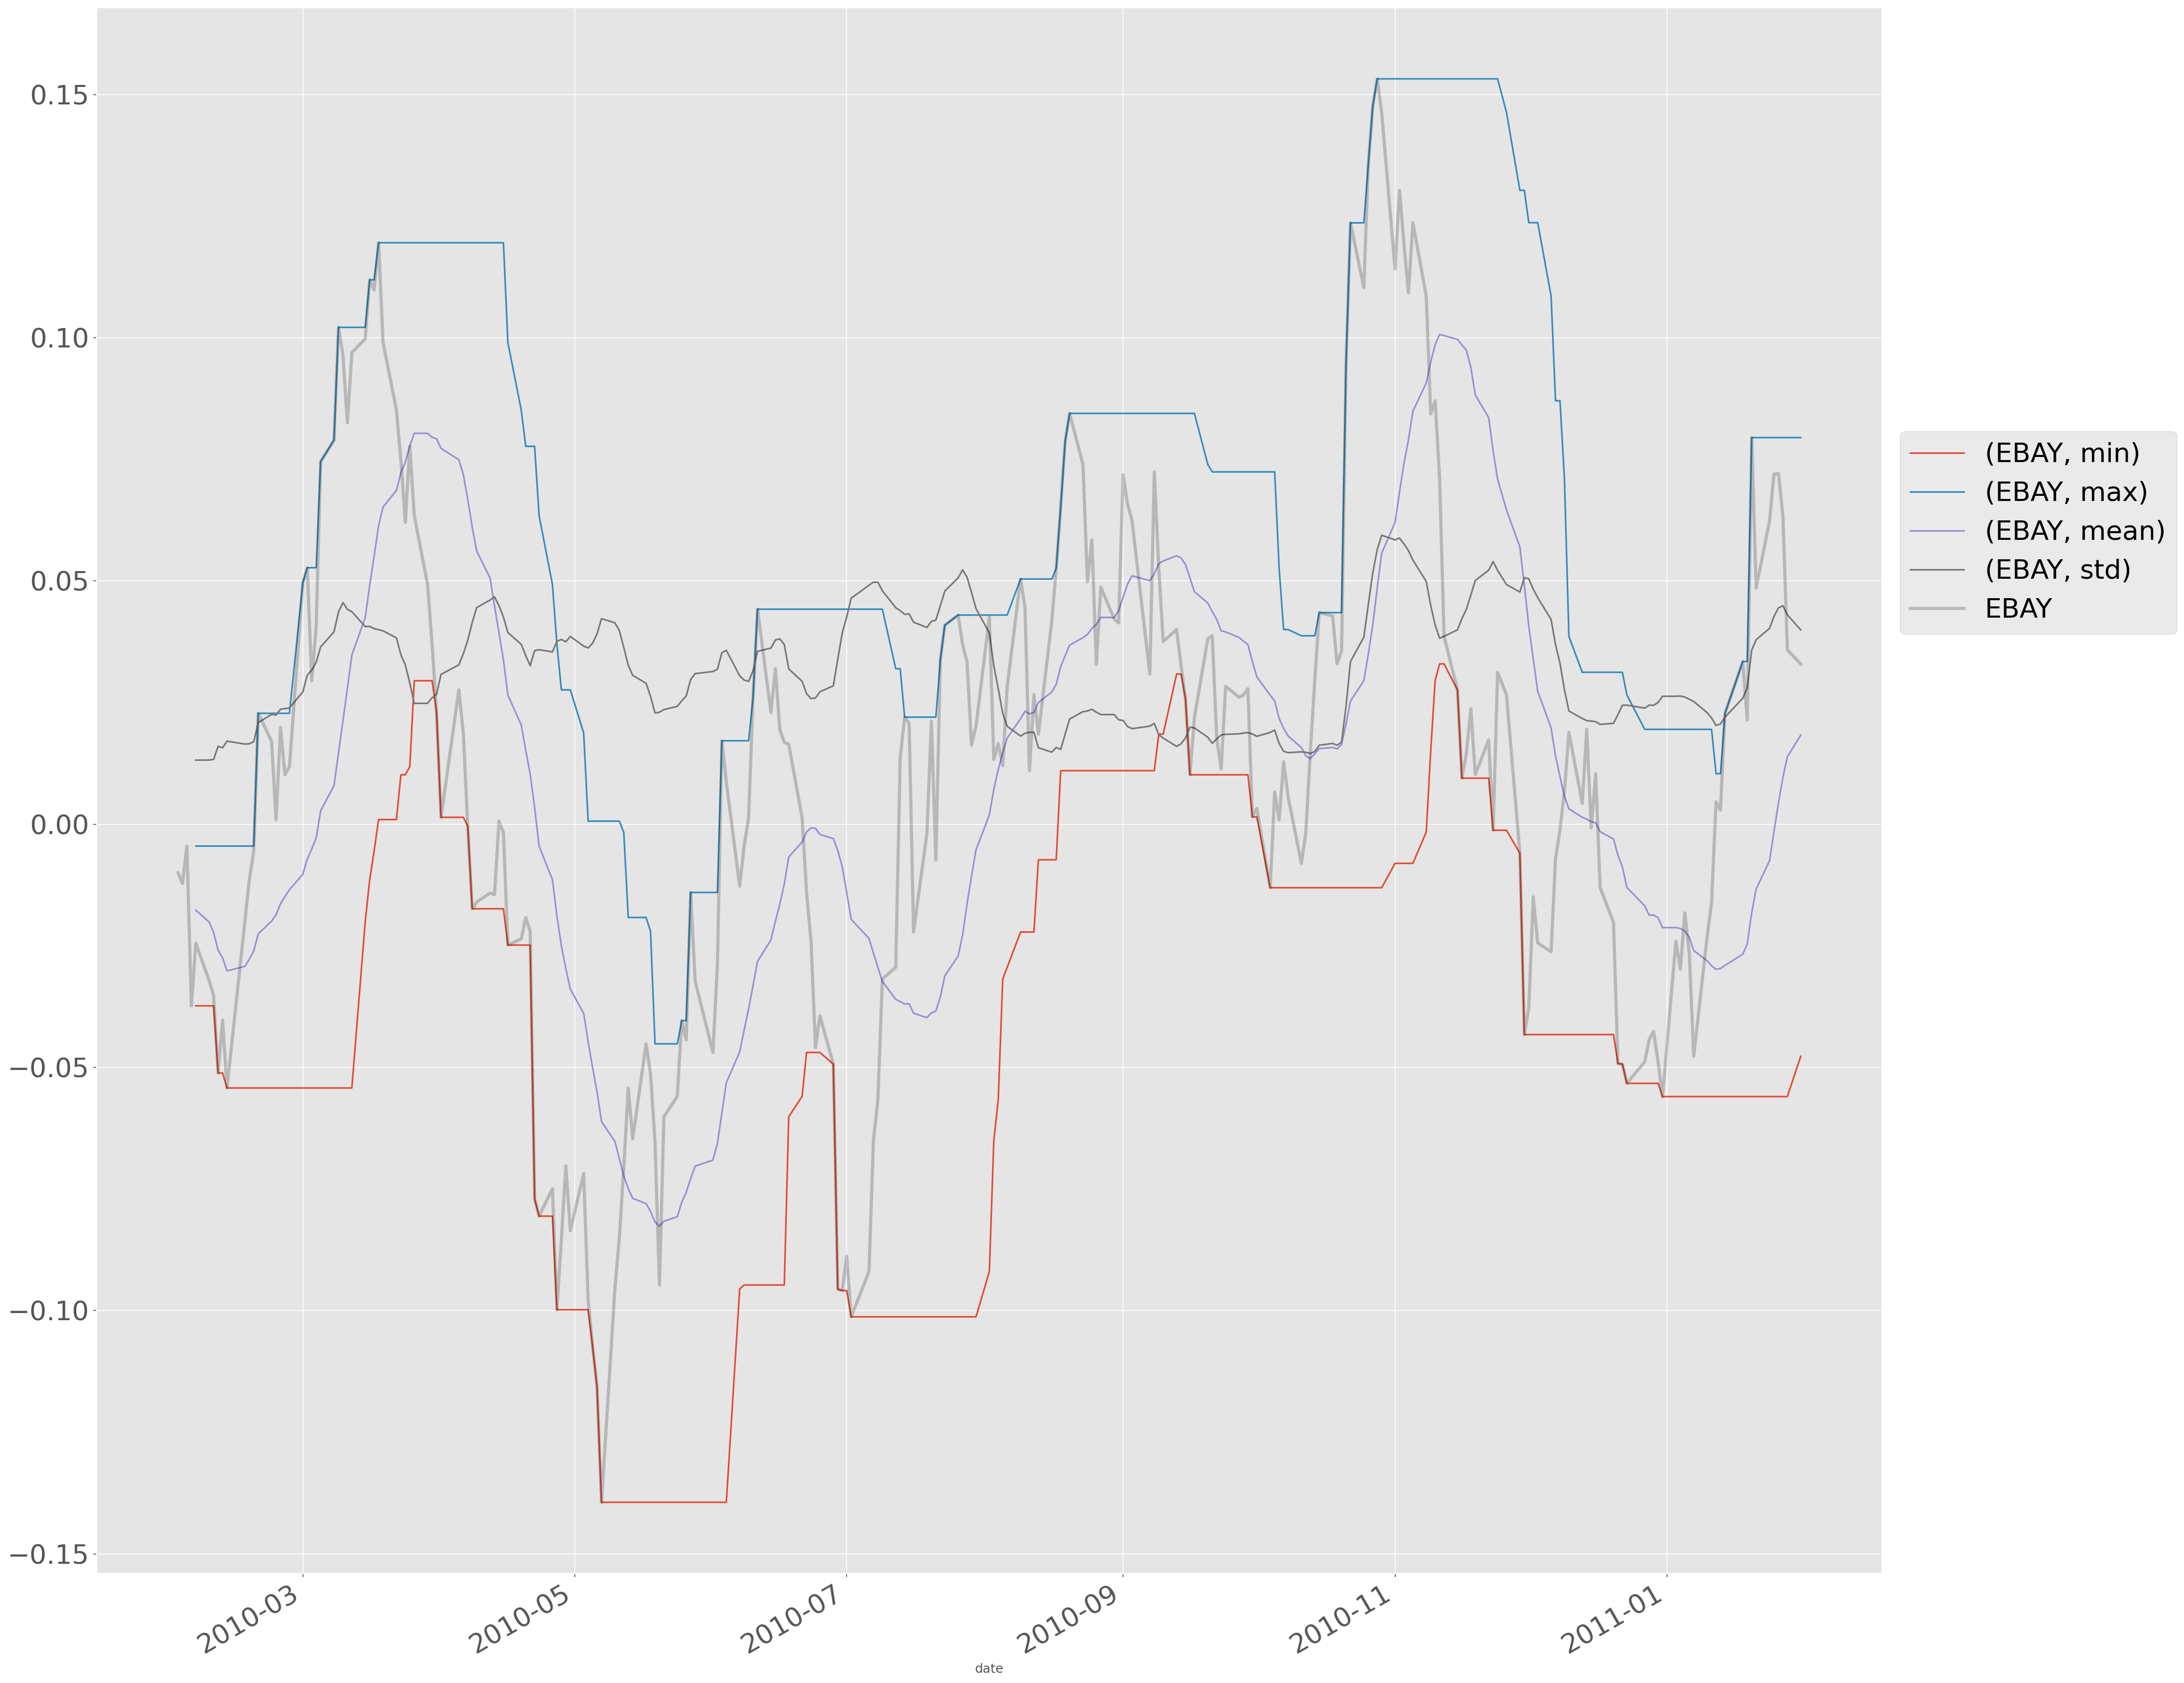

In [40]:
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6),prop={'size': 25})
plt.show()

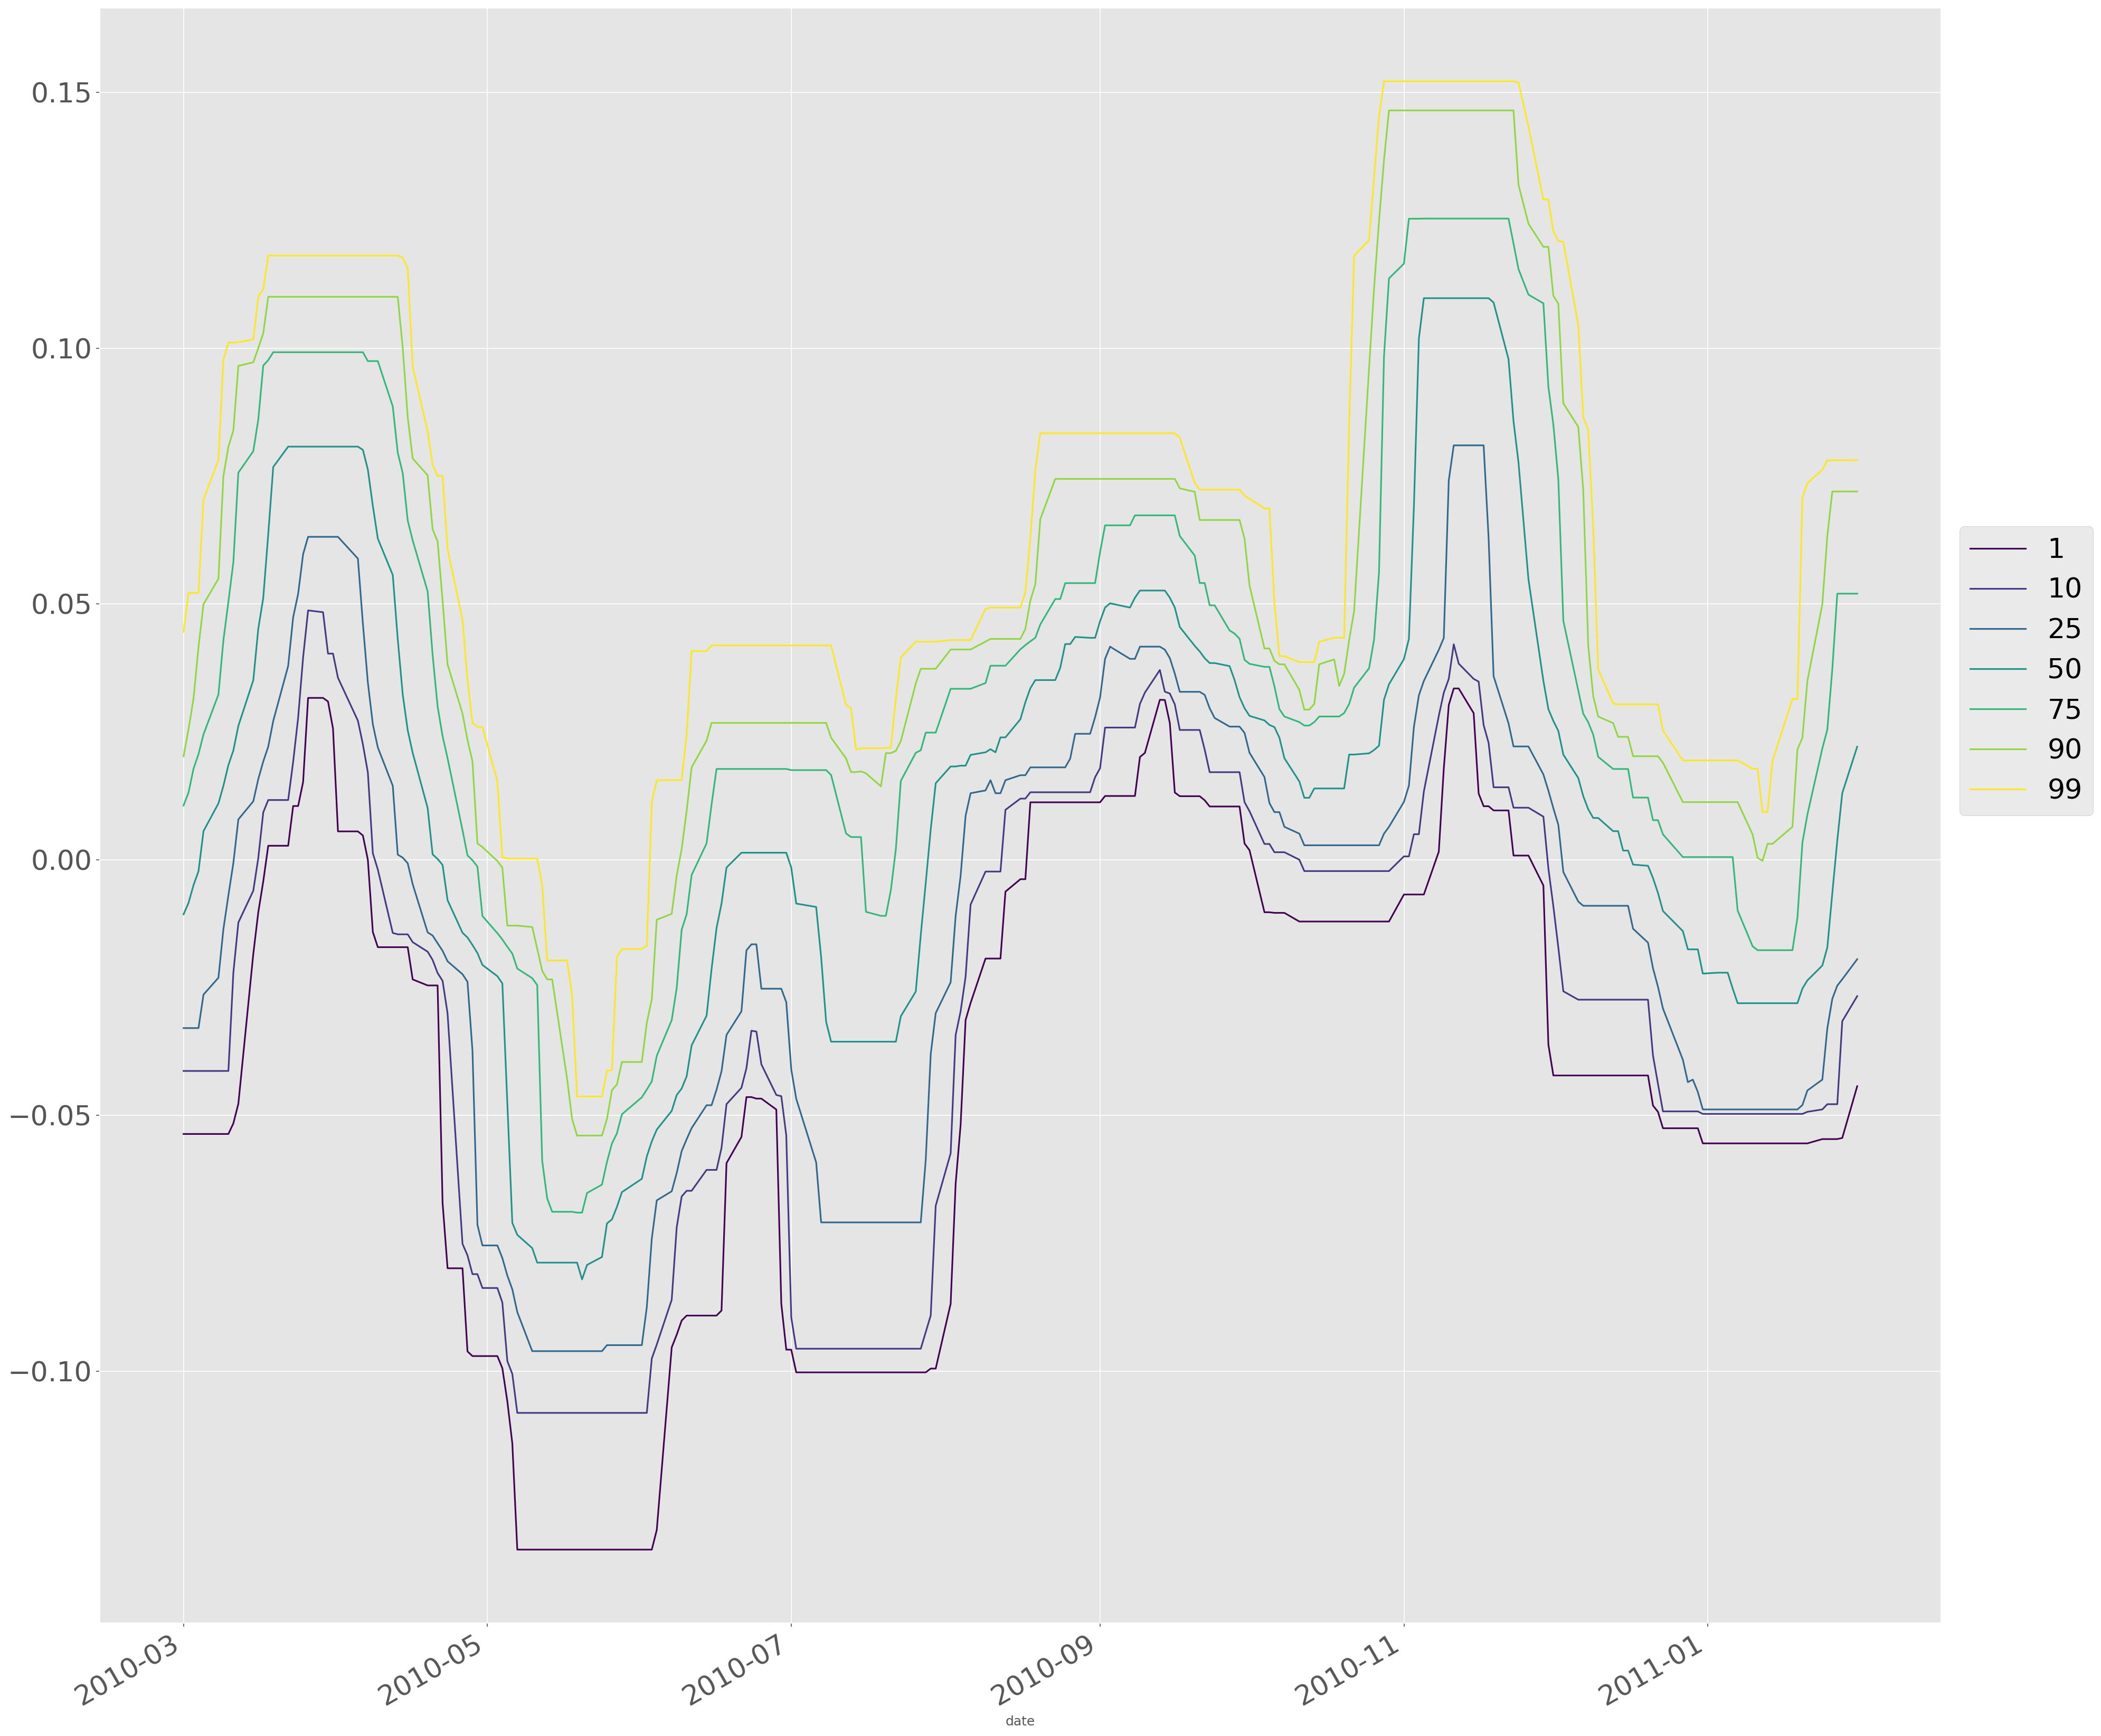

In [41]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5),prop={'size': 25})
plt.show()

In [42]:
prices_of_four = pd.read_csv('prices_of_four.csv', parse_dates=True, index_col=0)
display(prices_of_four)

ebay_prices = prices_of_four['EBAY']
prices_perc = ebay_prices.rolling(20).apply(percent_change)

prices_perc = prices_perc.loc["2014-01-02" :"2016-01-01"]
pd.to_datetime(prices_perc.index, utc=True)
prices_perc = prices_perc.to_frame()
display(prices_perc.info())

EBAY        NVDA       YHOO        AAPL
date                                                    
2010-01-04  23.900000   18.490000  17.100000  214.009998
2010-01-05  23.650000   18.760000  17.230000  214.379993
2010-01-06  23.500000   18.879999  17.170000  210.969995
2010-01-07  23.229998   18.510000  16.700001  210.580000
2010-01-08  23.509999   18.549999  16.700001  211.980005
...               ...         ...        ...         ...
2016-12-23  29.790001  109.779999  38.660000  116.519997
2016-12-27  30.240000  117.320000  38.919998  117.260002
2016-12-28  30.010000  109.250000  38.730000  116.760002
2016-12-29  29.980000  111.430000  38.639999  116.730003
2016-12-30  29.690001  106.739998  38.669998  115.820000

[1762 rows x 4 columns]

/tmp/ipython-input-1335160052.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = series[-1]


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2014-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EBAY    504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


None

In [43]:
print(prices_perc.head())

                EBAY
date                
2014-01-02  0.017938
2014-01-03  0.002268
2014-01-06 -0.027365
2014-01-07 -0.006665
2014-01-08 -0.017206


In [45]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek.tolist()
prices_perc['week_of_year'] = prices_perc.index.isocalendar().week.tolist()
prices_perc['month_of_year'] = prices_perc.index.month.tolist()


# Print prices_perc
# print(prices_perc)
display(prices_perc)

EBAY  day_of_week  week_of_year  month_of_year
date                                                          
2014-01-02  0.017938            3             1              1
2014-01-03  0.002268            4             1              1
2014-01-06 -0.027365            0             2              1
2014-01-07 -0.006665            1             2              1
2014-01-08 -0.017206            2             2              1
...              ...          ...           ...            ...
2015-12-24 -0.028684            3            52             12
2015-12-28 -0.026797            0            53             12
2015-12-29 -0.013726            1            53             12
2015-12-30 -0.017296            2            53             12
2015-12-31 -0.024640            3            53             12

[504 rows x 4 columns]